# Import Required Library

In [5]:
import mysql.connector

In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
import csv
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
from math import sqrt

In [57]:
import warnings
warnings.filterwarnings('ignore')

# Import the Dataset from mysql to Python

In [6]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    database="medicines_db",
    user="root",
    password="Admin@1234")

In [7]:
with conn.cursor() as cur:
    cur.execute("SELECT * FROM medicine_detail_backup")
    rows = cur.fetchall()

In [10]:
for row in rows:
    print(row)
pharma_data = pd.DataFrame(rows, columns=["Typeofsales","Specialisation", "Dept", "Dateofbill", "Quantity",
                           "ReturnQuantity", "Final_Cost", "Final_Sales", "RtnMRP", "Formulation", "DrugName", "SubCat", "SubCat1"])

('Sale', 'Specialisation6', 'Department1', datetime.date(2022, 6, 1), 1, 0, 55.406, 59.26, 0.0, 'Form1', 'ZINC ACETATE 20MG/5ML SYP', 'SYRUP & SUSPENSION', 'VITAMINS & MINERALS')
('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 7, 23), 1, 0, 768.638, 950.8, 0.0, 'Form1', 'CEFTAZIDIME 2GM+AVIBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 'Specialisation2', 'Department3', datetime.date(2022, 6, 23), 1, 0, 774.266, 4004.21, 0.0, 'Form2', 'EPTIFIBATIDE 0.75MG/ML', 'INJECTIONS', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', 'Specialisation40', 'Department1', datetime.date(2022, 3, 17), 2, 0, 40.798, 81.044, 0.0, 'Form1', 'WATER FOR INJECTION 10ML SOLUTION', 'INJECTIONS', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation5', 'Department1', datetime.date(2022, 12, 21), 1, 0, 40.434, 40.504, 0.0, 'Form1', 'LORAZEPAM 1MG', 'TABLETS & CAPSULES', 'CENTRAL NERVOUS SYSTEM')
('Return', 'Specialisation2', 'Department1', datetime.date(2022, 7, 15), 0, 8, 47.9

('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 9, 14), 3, 0, 97.12, 415.89, 0.0, 'Form1', 'PIPERACILLIN 4GM+ TAZOBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 'Specialisation14', 'Department1', datetime.date(2022, 1, 31), 1, 0, 40.568, 40.742, 0.0, 'Form2', 'ALPRAZOLAM 0.5MG', 'TABLETS & CAPSULES', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation15', 'Department1', datetime.date(2022, 2, 2), 2, 0, 58.368, 103.432, 0.0, 'Form1', 'SODIUM CHLORIDE 600MG + SODIUM LACTATE 320MG + POTASSIUM CHLORIDE 40MG + CALCIUM CHLORIDE 27MG/100ML', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation16', 'Department2', datetime.date(2022, 8, 29), 1, 0, 49.352, 60.8, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 5, 18), 3, 0, 47.728, 135.6, 0.0, 'Form1', 'MORPHINE SULPHATE 10MG/ML INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation9', 'Department1', d

('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 7, 23), 1, 0, 49.352, 60.8, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation16', 'Department1', datetime.date(2022, 3, 17), 2, 0, 86.112, 137.64, 0.0, 'Form1', 'LACOSAMIDE 20ML INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Return', 'Specialisation16', 'Department1', datetime.date(2022, 8, 8), 0, 1, 44.636, 0.0, 47.632, 'Form1', 'DEXTROSE 5GM + SODIUM CHLORIDE 0.9%W/V 500ML IV FLUID', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation6', 'Department1', datetime.date(2022, 8, 28), 1, 0, 47.146, 48.4, 0.0, 'Form1', 'SODIUM CHLORIDE IVF 100ML', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 1, 16), 2, 0, 51.398, 144.0, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation20', 'Department1', datetime.date(2022, 6, 24), 1, 0, 41.586, 42.09, 0.0, 'Form1',

('Sale', 'Specialisation48', 'Department1', datetime.date(2022, 6, 22), 5, 0, 164.32, 484.0, 0.0, 'Form1', 'MULTIPLE ELECTROLYTES 500ML IVF', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation42', 'Department2', datetime.date(2022, 7, 15), 1, 0, 50.046, 52.978, 0.0, 'Form1', 'SODIUM CHLORIDE 600MG + SODIUM LACTATE 320MG + POTASSIUM CHLORIDE 40MG + CALCIUM CHLORIDE 27MG/100ML', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation16', 'Department1', datetime.date(2022, 10, 11), 1, 0, 67.528, 78.234, 0.0, 'Form1', 'LACTULOSE 150ML SYP', 'SYRUP & SUSPENSION', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation4', 'Department2', datetime.date(2022, 8, 4), 1, 0, 52.588, 91.6, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation8', 'Department1', datetime.date(2022, 8, 10), 7, 0, 59.82, 304.78, 0.0, 'Form2', 'HEPARIN10IU + SODIUM CHLORIDE + BENZYL  ALCOHOL 2ML INJ', '

('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 10, 16), 1, 0, 49.956, 62.8, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation11', 'Department1', datetime.date(2022, 4, 15), 1, 0, 47.016, 48.768, 0.0, 'Form1', 'AMLODIPINE 5MG', 'TABLETS & CAPSULES', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 12, 2), 2, 0, 59.914, 125.6, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 8, 5), 2, 0, 57.472, 321.02, 0.0, 'Form1', 'PARACETAMOL 1GM IV INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation1', 'Department1', datetime.date(2022, 7, 27), 1, 0, 51.85, 57.568, 0.0, 'Form1', 'SODIUM CHLORIDE 0.9%', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation11', 'Department2', datetime.date(2022, 10, 20), 1, 0, 55.008, 57.566, 0.0, 'Form2', 'SODIUM CHLORIDE 0.9%', 'IV FLUIDS; ELECTROLYTES;

('Sale', 'Specialisation5', 'Department1', datetime.date(2022, 8, 1), 1, 0, 42.06, 42.6, 0.0, 'Form1', 'GLYCOPYRROLATE', 'INJECTIONS', 'MUSCULO-SKELETAL SYSTEM')
('Sale', 'Specialisation33', 'Department2', datetime.date(2022, 3, 8), 1, 0, 44.368, 45.5, 0.0, 'Form1', 'BUPIVACAINE 5MG', 'INJECTIONS', 'ANAESTHETICS')
('Sale', 'Specialisation3', 'Department1', datetime.date(2022, 3, 4), 2, 0, 44.704, 87.096, 0.0, 'Form2', 'SODIUM CHLORIDE 0.9%', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 10, 19), 4, 0, 1200.32, 2543.2, 0.0, 'Patent', 'MEROPENEM 1GM INJ', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 'Specialisation42', 'Department1', datetime.date(2022, 5, 3), 1, 0, 42.464, 49.984, 0.0, 'Form1', 'PANTOPRAZOLE 40MG INJ', 'INJECTIONS', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 11, 23), 1, 0, 82.4, 86.8, 0.0, 'Form1', 'TACROLIMUS CAP 0.5MG', 

('Sale', 'Specialisation3', 'Department1', datetime.date(2022, 7, 8), 1, 0, 42.464, 49.984, 0.0, 'Form1', 'PANTOPRAZOLE 40MG INJ', 'INJECTIONS', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Return', 'Specialisation7', 'Department1', datetime.date(2022, 5, 11), 0, 1, 57.362, 0.0, 62.61, 'Form1', 'BACLOFEN 10MG  TAB', 'TABLETS & CAPSULES', 'MUSCULO-SKELETAL SYSTEM')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 1, 28), 2, 0, 50.336, 93.456, 0.0, 'Form2', 'BISACODYL 10MG', 'PESSARIES & SUPPOSITORIES', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Return', 'Specialisation31', 'Department1', datetime.date(2022, 3, 5), 0, 3, 49.066, 0.0, 132.372, 'Form1', 'LEVOSALBUTAMOL 1.25MG + IPRATROPIUM BROMIDE 500MCG RESPULES', 'INHALERS & RESPULES', 'RESPIRATORY SYSTEM')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 7, 14), 3, 0, 66.208, 481.53, 0.0, 'Form1', 'PARACETAMOL 1GM IV INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation4', 'Department2', da

('Sale', 'Specialisation3', 'Department1', datetime.date(2022, 8, 14), 1, 0, 51.85, 57.568, 0.0, 'Form1', 'SODIUM CHLORIDE 0.9%', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 12, 19), 2, 0, 59.914, 125.6, 0.0, 'Form1', 'unknown', 'unknown', 'unknown')
('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 8, 13), 1, 0, 95.888, 140.682, 0.0, 'Form1', 'RIFAXIMIN 550MG TAB', 'TABLETS & CAPSULES', 'ANTI-INFECTIVES')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 3, 5), 1, 0, 66.75, 78.0, 0.0, 'Form1', 'DICLOFENAC DIETHYLAMINE + LINSEED OIL + METHYL SALICYLATE + MENTHOL 60GM SPRAY', 'SPRAY', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation23', 'Department1', datetime.date(2022, 4, 29), 1, 0, 284.16, 325.0, 0.0, 'Form1', 'EPOETIN BETA', 'INJECTIONS', 'CARDIIVASCULAR&HEMATOPOIETIC SYSTEM')
('Sale', 'Specialisation2', 'Department1', datetime.date(2022, 7, 27), 2, 0, 41.37, 81.64

('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 5, 21), 1, 0, 41.658, 43.2, 0.0, 'Form1', 'VITAMIN K 1ML INJ', 'INJECTIONS', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', 'Specialisation8', 'Department1', datetime.date(2022, 4, 22), 1, 0, 64.268, 74.518, 0.0, 'Form1', 'LACTULOSE 150ML SYP', 'SYRUP & SUSPENSION', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation26', 'Department1', datetime.date(2022, 3, 23), 2, 0, 89.728, 183.6, 0.0, 'Form1', 'MULTIPLE ELECTROLYTES 500ML IVF', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 4, 20), 1, 0, 42.576, 45.2, 0.0, 'Form1', 'MORPHINE SULPHATE 10MG/ML INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Return', 'Specialisation27', 'Department1', datetime.date(2022, 3, 28), 0, 3, 42.956, 0.0, 127.872, 'Form1', 'ONDANSETRON 2MG/ML', 'INJECTIONS', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation21', 'Department1

('Sale', 'Specialisation15', 'Department1', datetime.date(2022, 8, 30), 3, 0, 42.956, 128.718, 0.0, 'Form1', 'ONDANSETRON 2MG/ML', 'INJECTIONS', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation26', 'Department1', datetime.date(2022, 12, 29), 1, 0, 59.04, 138.63, 0.0, 'Form1', 'PIPERACILLIN 4GM+ TAZOBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 'Specialisation6', 'Department1', datetime.date(2022, 6, 28), 4, 0, 69.604, 219.4, 0.0, 'Form1', 'LEVETIRACETAM 100MG/ML INJ', 'INJECTIONS', 'CENTRAL NERVOUS SYSTEM')
('Sale', 'Specialisation7', 'Department1', datetime.date(2022, 3, 31), 1, 0, 42.408, 43.548, 0.0, 'Form1', 'SODIUM CHLORIDE 0.9%', 'IV FLUIDS; ELECTROLYTES; TPN', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 5, 1), 1, 0, 42.464, 49.984, 0.0, 'Form1', 'PANTOPRAZOLE 40MG INJ', 'INJECTIONS', 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM')
('Sale', 'Specialisation4', 'Department1', datetime.date(2022, 5,

In [11]:
pharma_data.head()

Typeofsales    Specialisation         Dept  Dateofbill  Quantity  \
0        Sale   Specialisation6  Department1  2022-06-01         1   
1        Sale   Specialisation7  Department1  2022-07-23         1   
2        Sale   Specialisation2  Department3  2022-06-23         1   
3        Sale  Specialisation40  Department1  2022-03-17         2   
4        Sale   Specialisation5  Department1  2022-12-21         1   

   ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0               0      55.406       59.260     0.0       Form1   
1               0     768.638      950.800     0.0       Form1   
2               0     774.266     4004.210     0.0       Form2   
3               0      40.798       81.044     0.0       Form1   
4               0      40.434       40.504     0.0       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS   
4                      LORAZEPAM 1MG  TABLETS & CAPSULES   

                                 SubCat1  
0                    VITAMINS & MINERALS  
1                        ANTI-INFECTIVES  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS  
4                 CENTRAL NERVOUS SYSTEM

# Dataframe shape and datatypes

In [12]:
pharma_data.shape

(14506, 13)

In [13]:
pharma_data.isnull().sum()

Typeofsales       0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [14]:
pharma_data.dtypes

Typeofsales        object
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

# Handeling Duplicates

In [16]:
duplicate_value = pharma_data.duplicated()  
sum(duplicate_value)

463

In [22]:
print(duplicate_value)

0        False
1        False
2        False
3        False
4        False
         ...  
14501    False
14502    False
14503    False
14504    False
14505    False
Length: 14506, dtype: bool


In [23]:
sum(duplicate_value)

463

In [28]:
duplicate = pharma_data[pharma_data.duplicated()]

In [29]:
print(duplicate)

      Typeofsales    Specialisation         Dept  Dateofbill  Quantity  \
288          Sale   Specialisation6  Department1  2022-06-01         1   
289          Sale   Specialisation7  Department1  2022-07-23         1   
290          Sale   Specialisation2  Department3  2022-06-23         1   
291          Sale  Specialisation40  Department1  2022-03-17         2   
292          Sale   Specialisation5  Department1  2022-12-21         1   
...           ...               ...          ...         ...       ...   
14279        Sale   Specialisation2  Department3  2022-09-17         2   
14322        Sale   Specialisation4  Department1  2022-12-12         1   
14404        Sale   Specialisation3  Department1  2022-05-24         2   
14467        Sale   Specialisation4  Department1  2022-09-19         2   
14492      Return   Specialisation5  Department1  2022-04-12         0   

       ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
288                 0      55.406       5

In [30]:
# Remove duplicates
pharma_data = pharma_data.drop_duplicates() 
duplicate = pharma_data.duplicated()
sum(duplicate) 

0

In [31]:
pharma_data.shape

(14043, 13)

In [33]:
pharma_data.Formulation.value_counts()

Form1      11474
Form2       1310
unknown      646
Patent       534
Form3         79
Name: Formulation, dtype: int64

In [34]:
pharma_data.DrugName.value_counts()

unknown                                                                     1615
SODIUM CHLORIDE IVF 100ML                                                    594
SODIUM CHLORIDE 0.9%                                                         519
MULTIPLE ELECTROLYTES 500ML IVF                                              460
ONDANSETRON 2MG/ML                                                           441
                                                                            ... 
BASILIXIMAB 20 MG                                                              1
MULTIVITAMIN + MULTIMINERAL + ANTIOXIDANTS + METHYLCOBALAMIN 200ML SYRUP       1
ROPINIROLE 0.5MG TAB                                                           1
IRON SUCROSE 100MG INJ                                                         1
FENTANYL 12.5MCG/HR                                                            1
Name: DrugName, Length: 752, dtype: int64

In [35]:
pharma_data.SubCat.value_counts()

INJECTIONS                      6437
IV FLUIDS; ELECTROLYTES; TPN    2670
unknown                         1615
TABLETS & CAPSULES              1496
INHALERS & RESPULES              468
OINTMENTS; CREAMS & GELS         361
LIQUIDS & SOLUTIONS              262
SYRUP & SUSPENSION               235
POWDER                           215
NUTRITIONAL SUPPLEMENTS          125
PESSARIES & SUPPOSITORIES         55
DROPS                             53
VACCINE                           19
SPRAY                             12
PATCH                             11
LOTIONS                            5
SOLUTION                           3
SACHETS                            1
Name: SubCat, dtype: int64

In [36]:
pharma_data.SubCat1.value_counts()

INTRAVENOUS & OTHER STERILE SOLUTIONS                                 3150
GASTROINTESTINAL & HEPATOBILIARY SYSTEM                               1719
unknown                                                               1638
ANTI-INFECTIVES                                                       1629
CARDIOVASCULAR & HEMATOPOIETIC SYSTEM                                 1468
CENTRAL NERVOUS SYSTEM                                                1252
RESPIRATORY SYSTEM                                                     592
ANAESTHETICS                                                           587
NUTRITION                                                              329
MUSCULO-SKELETAL SYSTEM                                                322
VITAMINS & MINERALS                                                    298
HORMONES                                                               287
IMMUNOLOGY                                                             185
ENDOCRINE & METABOLIC SYS

#  Missing values

In [37]:
pharma_data.Formulation.mode()

0    Form1
Name: Formulation, dtype: object

In [38]:
pharma_data.replace('unknown', pd.NA, inplace=True)

In [39]:
pharma_data.isnull().sum()

Typeofsales          0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        646
DrugName          1615
SubCat            1615
SubCat1           1638
dtype: int64

# Missing value Imputations

In [40]:
pharma_data.Formulation.fillna('Form1',inplace =True)

In [41]:
pharma_data.Formulation.isnull().sum()

0

In [42]:
pharma_data.DrugName.mode()

0    SODIUM CHLORIDE IVF 100ML
Name: DrugName, dtype: object

In [45]:
pharma_data.DrugName.fillna('SODIUM CHLORIDE IVF 100ML',inplace =True)

In [46]:
pharma_data.DrugName.isnull().sum()

0

In [47]:
pharma_data.SubCat.mode()

0    INJECTIONS
Name: SubCat, dtype: object

In [48]:
pharma_data.SubCat.fillna('INJECTIONS',inplace =True)

In [49]:
pharma_data.SubCat.isnull().sum()

0

In [50]:
pharma_data.SubCat1.mode()

0    INTRAVENOUS & OTHER STERILE SOLUTIONS
Name: SubCat1, dtype: object

In [51]:
pharma_data.SubCat1.fillna('INTRAVENOUS & OTHER STERILE SOLUTIONS',inplace =True)

In [52]:
pharma_data.SubCat1.isnull().sum()

0

In [53]:
pharma_data.isnull().sum()

Typeofsales       0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [54]:
pharma_data["Dateofbill"] = pd.to_datetime(pharma_data["Dateofbill"])

In [55]:
pharma_data.dtypes

Typeofsales               object
Specialisation            object
Dept                      object
Dateofbill        datetime64[ns]
Quantity                   int64
ReturnQuantity             int64
Final_Cost               float64
Final_Sales              float64
RtnMRP                   float64
Formulation               object
DrugName                  object
SubCat                    object
SubCat1                   object
dtype: object

# Outlier Detection

<AxesSubplot:xlabel='Quantity'>

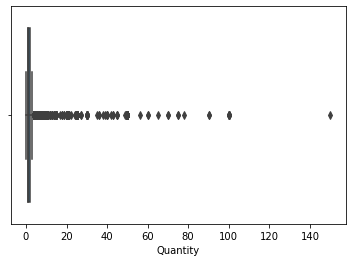

In [58]:
sns.boxplot(pharma_data.Quantity)  

### Outlier treatment for Quantity Column

In [60]:
Q1 = pharma_data.Quantity.quantile(0.10)

In [61]:
Q2 = pharma_data.Quantity.quantile(0.90)

In [63]:
IQR =Q2-Q1

In [64]:
pharma_data= pharma_data[(pharma_data.Quantity>= Q1-1.5*IQR) & (pharma_data.Quantity <= Q2 +1.5*IQR)] 

<AxesSubplot:xlabel='Quantity'>

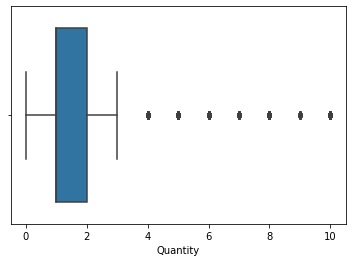

In [65]:
sns.boxplot(pharma_data.Quantity) 

### Outlier treatment for Final_cost Column

<AxesSubplot:xlabel='Final_Cost'>

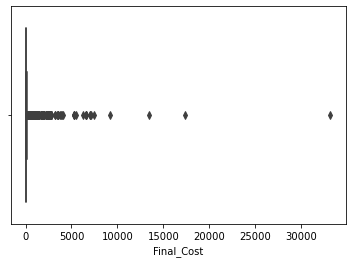

In [67]:
sns.boxplot(pharma_data.Final_Cost) 

In [68]:
Q1 = pharma_data.Final_Cost.quantile(0.10)

In [69]:
Q3 = pharma_data.Final_Cost.quantile(0.90)

In [71]:
IQR =Q3-Q1

In [72]:
pharma_data= pharma_data[(pharma_data.Final_Cost>= Q1-1.5*IQR) & (pharma_data.Final_Cost <= Q3 +1.5*IQR)] 

<AxesSubplot:xlabel='Final_Cost'>

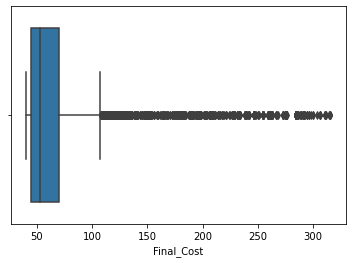

In [73]:
sns.boxplot(pharma_data.Final_Cost) 

## Outlier treatment for Final_Sales Column

<AxesSubplot:xlabel='Final_Sales'>

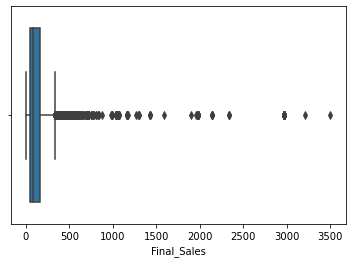

In [74]:
sns.boxplot(pharma_data.Final_Sales)

In [75]:
Q1 = pharma_data.Final_Sales.quantile(0.10)

In [76]:
Q3 = pharma_data.Final_Sales.quantile(0.90)

In [77]:
IQR =Q3-Q1

In [78]:
pharma_data= pharma_data[(pharma_data.Final_Sales>= Q1-1.5*IQR) & (pharma_data.Final_Sales <= Q3 +1.5*IQR)] 

<AxesSubplot:xlabel='Final_Sales'>

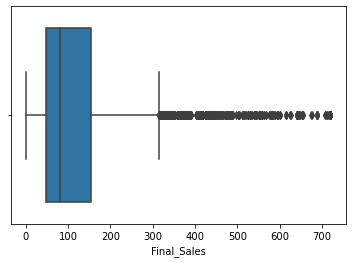

In [79]:
sns.boxplot(pharma_data.Final_Sales)

# Outlier treatment for RtnMRP Column

<AxesSubplot:xlabel='RtnMRP'>

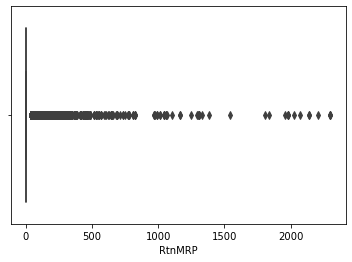

In [80]:
sns.boxplot(pharma_data.RtnMRP)

In [81]:
Q1 = pharma_data.RtnMRP.quantile(0.10)

In [82]:
Q3 = pharma_data.RtnMRP.quantile(0.90)

In [83]:
IQR =Q3-Q1

In [84]:
pharma_data= pharma_data[(pharma_data.RtnMRP>= Q1-1.5*IQR) & (pharma_data.RtnMRP <= Q3 +1.5*IQR)] 

<AxesSubplot:xlabel='RtnMRP'>

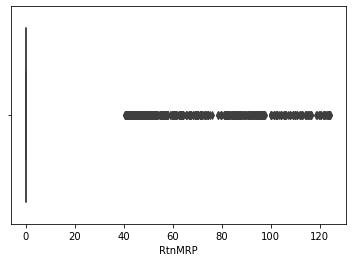

In [85]:
sns.boxplot(pharma_data.RtnMRP)

In [86]:
pharma_data.describe()

Quantity  ReturnQuantity    Final_Cost   Final_Sales        RtnMRP
count  12406.000000     12406.00000  12406.000000  12406.000000  12406.000000
mean       1.805497         0.09705     66.038814    125.499050      5.335170
std        1.668053         0.36195     39.709091    118.701238     19.689555
min        0.000000         0.00000     40.000000      0.000000      0.000000
25%        1.000000         0.00000     44.437500     49.984000      0.000000
50%        1.000000         0.00000     51.366000     85.812000      0.000000
75%        2.000000         0.00000     67.552000    160.510000      0.000000
max       10.000000         3.00000    315.654000    720.000000    124.242000

# First Moment Business Decision 

In [87]:
# Mean
pharma_data.mean()

Quantity            1.805497
ReturnQuantity      0.097050
Final_Cost         66.038814
Final_Sales       125.499050
RtnMRP              5.335170
dtype: float64

In [88]:
# Median
pharma_data.median()

Quantity           1.000
ReturnQuantity     0.000
Final_Cost        51.366
Final_Sales       85.812
RtnMRP             0.000
dtype: float64

In [89]:
# Mode
pharma_data.mode()

Typeofsales   Specialisation         Dept Dateofbill  Quantity  \
0        Sale  Specialisation4  Department1 2022-12-09         1   

   ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0               0      49.352          0.0     0.0       Form1   

                    DrugName      SubCat  \
0  SODIUM CHLORIDE IVF 100ML  INJECTIONS   

                                 SubCat1  
0  INTRAVENOUS & OTHER STERILE SOLUTIONS

# Second Moment Business Decision

In [90]:
# Variance
pharma_data.var()

Quantity              2.782399
ReturnQuantity        0.131008
Final_Cost         1576.811890
Final_Sales       14089.983887
RtnMRP              387.678589
dtype: float64

In [91]:
# Standard Deviation
print(pharma_data.std())

Dateofbill        104 days 12:11:50.693848044
Quantity                             1.668053
ReturnQuantity                        0.36195
Final_Cost                          39.709091
Final_Sales                        118.701238
RtnMRP                              19.689555
dtype: object


# Third Moment Business Decision

In [92]:
# skewness
pharma_data.skew()

Quantity          2.561128
ReturnQuantity    4.110489
Final_Cost        3.131621
Final_Sales       2.017401
RtnMRP            3.853811
dtype: float64

# Fourth Moment Business Decision

In [93]:
# Kurtosis
pharma_data.kurt()

Quantity           8.424422
ReturnQuantity    17.875639
Final_Cost        11.415458
Final_Sales        4.775673
RtnMRP            14.443477
dtype: float64

# Univariate Analysis

<AxesSubplot:xlabel='RtnMRP', ylabel='Density'>

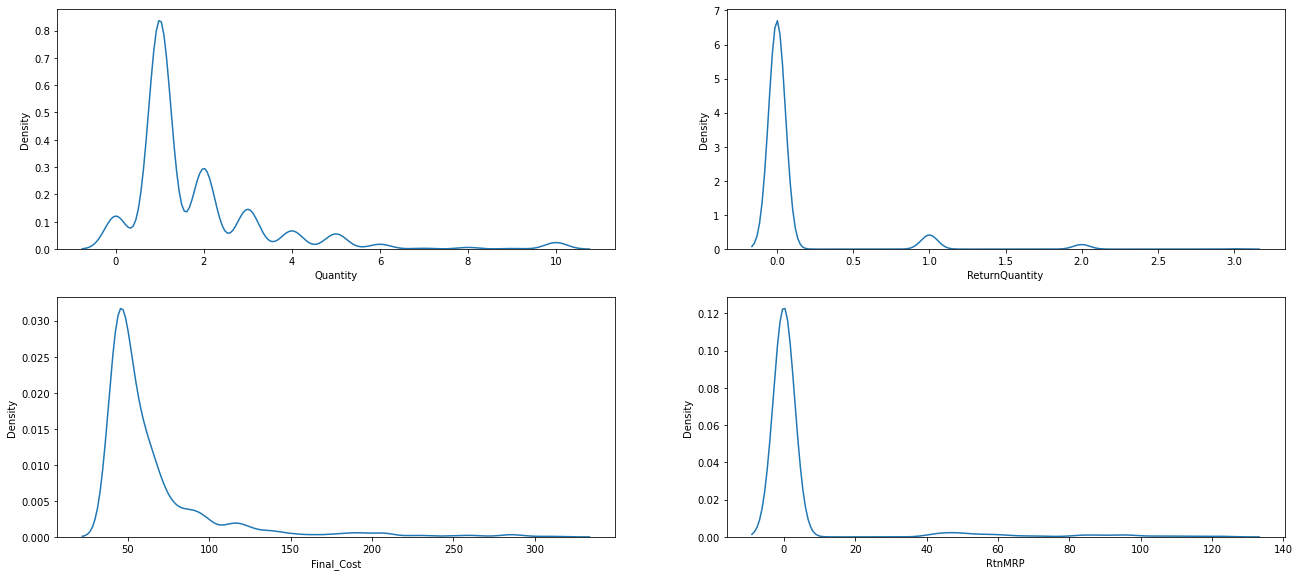

In [99]:
plt.figure(1,figsize=(22,15))

plt.subplot(3,2,1)
sns.distplot(pharma_data['Quantity'],hist=False) 

plt.subplot(3,2,2)
sns.distplot(pharma_data['ReturnQuantity'],hist=False)

plt.subplot(3,2,3)
sns.distplot(pharma_data['Final_Cost'],hist=False)

plt.subplot(3,2,4)
sns.distplot(pharma_data['RtnMRP'],hist=False)



In [106]:
 pharma_data.Specialisation.value_counts()

Specialisation4     3269
Specialisation7     1691
Specialisation3      651
Specialisation2      565
Specialisation8      510
Specialisation20     499
Specialisation11     493
Specialisation16     483
Specialisation14     424
Specialisation1      399
Specialisation5      337
Specialisation21     320
Specialisation26     319
Specialisation6      225
Specialisation23     221
Specialisation25     195
Specialisation31     168
Specialisation9      157
Specialisation17     152
Specialisation15     129
Specialisation42     122
Specialisation27     113
Specialisation50      99
Specialisation10      99
Specialisation33      89
Specialisation55      86
Specialisation43      71
Specialisation45      54
Specialisation34      51
Specialisation39      44
Specialisation40      40
Specialisation41      37
Specialisation28      31
Specialisation19      29
Specialisation61      23
Specialisation49      22
Specialisation12      22
Specialisation48      22
Specialisation54      18
Specialisation22      16


<AxesSubplot:>

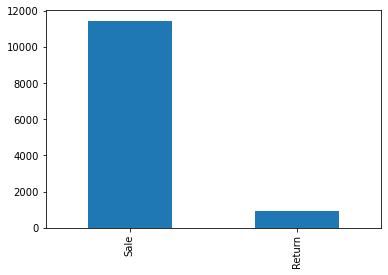

In [108]:
 pharma_data.Typeofsales.value_counts().plot.bar()

<AxesSubplot:>

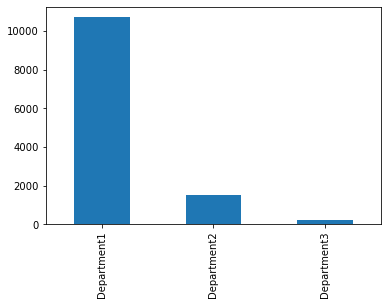

In [109]:
pharma_data.Dept.value_counts().plot.bar()

In [110]:
# Create a new 'Month' column
pharma_data['Month'] = pharma_data['Dateofbill'].dt.month

In [111]:
pharma_data.head()

Typeofsales    Specialisation         Dept Dateofbill  Quantity  \
0        Sale   Specialisation6  Department1 2022-06-01         1   
3        Sale  Specialisation40  Department1 2022-03-17         2   
4        Sale   Specialisation5  Department1 2022-12-21         1   
6        Sale   Specialisation2  Department1 2022-05-22         1   
7        Sale   Specialisation4  Department1 2022-01-12         3   

   ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0               0      55.406       59.260     0.0       Form1   
3               0      40.798       81.044     0.0       Form1   
4               0      40.434       40.504     0.0       Form1   
6               0      41.862       42.218     0.0       Form1   
7               0      60.026      142.752     0.0       Form1   

                            DrugName                        SubCat  \
0          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION   
3  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
4                      LORAZEPAM 1MG            TABLETS & CAPSULES   
6                 FUROSEMIDE 10MG/ML                    INJECTIONS   
7          SODIUM CHLORIDE IVF 100ML  IV FLUIDS; ELECTROLYTES; TPN   

                                 SubCat1  Month  
0                    VITAMINS & MINERALS      6  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS      3  
4                 CENTRAL NERVOUS SYSTEM     12  
6  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM      5  
7  INTRAVENOUS & OTHER STERILE SOLUTIONS      1

In [112]:
pharma_data['Month'] = pharma_data['Dateofbill'].dt.strftime('%b')

In [113]:
pharma_data.head()

Typeofsales    Specialisation         Dept Dateofbill  Quantity  \
0        Sale   Specialisation6  Department1 2022-06-01         1   
3        Sale  Specialisation40  Department1 2022-03-17         2   
4        Sale   Specialisation5  Department1 2022-12-21         1   
6        Sale   Specialisation2  Department1 2022-05-22         1   
7        Sale   Specialisation4  Department1 2022-01-12         3   

   ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0               0      55.406       59.260     0.0       Form1   
3               0      40.798       81.044     0.0       Form1   
4               0      40.434       40.504     0.0       Form1   
6               0      41.862       42.218     0.0       Form1   
7               0      60.026      142.752     0.0       Form1   

                            DrugName                        SubCat  \
0          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION   
3  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
4                      LORAZEPAM 1MG            TABLETS & CAPSULES   
6                 FUROSEMIDE 10MG/ML                    INJECTIONS   
7          SODIUM CHLORIDE IVF 100ML  IV FLUIDS; ELECTROLYTES; TPN   

                                 SubCat1 Month  
0                    VITAMINS & MINERALS   Jun  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS   Mar  
4                 CENTRAL NERVOUS SYSTEM   Dec  
6  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM   May  
7  INTRAVENOUS & OTHER STERILE SOLUTIONS   Jan

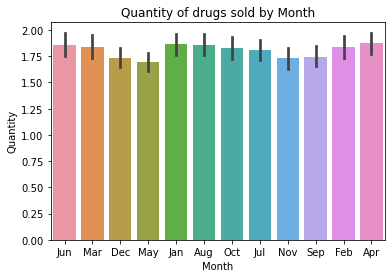

In [115]:
sns.barplot(data = pharma_data, x = 'Month', y = 'Quantity')
plt.title('Quantity of drugs sold by Month')
plt.show()

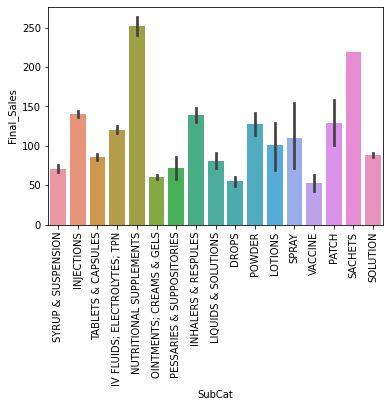

In [122]:
sns.barplot(data = pharma_data, x = 'SubCat', y = 'Final_Sales')
plt.xticks(rotation=90)
# plt.title('Quantity of drugs sold by Month')
plt.show()

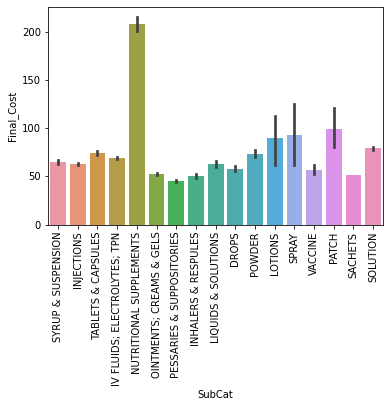

In [123]:
sns.barplot(data = pharma_data, x = 'SubCat', y = 'Final_Cost')
plt.xticks(rotation=90)
# plt.title('Quantity of drugs sold by Month')
plt.show()

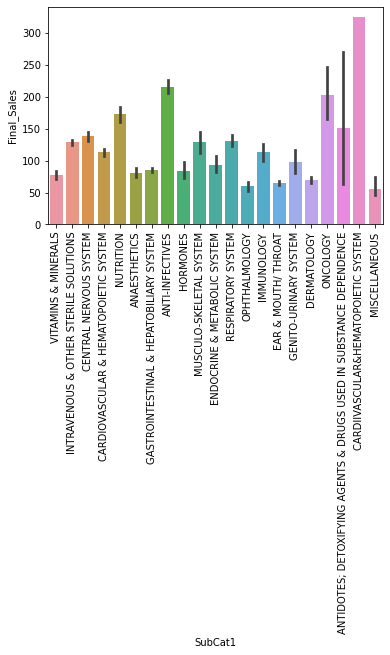

In [125]:
sns.barplot(data = pharma_data, x = 'SubCat1', y = 'Final_Sales')
plt.xticks(rotation=90)
# plt.title('Quantity of drugs sold by Month')
plt.show()

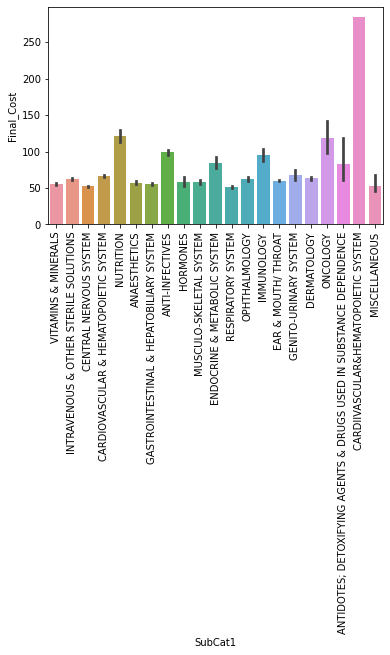

In [126]:
sns.barplot(data = pharma_data, x = 'SubCat1', y = 'Final_Cost')
plt.xticks(rotation=90)
# plt.title('Quantity of drugs sold by Month')
plt.show()

In [127]:
pharma_data.columns

Index(['Typeofsales', 'Specialisation', 'Dept', 'Dateofbill', 'Quantity',
       'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP', 'Formulation',
       'DrugName', 'SubCat', 'SubCat1', 'Month'],
      dtype='object')

In [138]:
pharma_data.DrugName.value_counts()

SODIUM CHLORIDE IVF 100ML                                                   1953
SODIUM CHLORIDE 0.9%                                                         503
PANTOPRAZOLE 40MG INJ                                                        429
ONDANSETRON 2MG/ML                                                           427
MULTIPLE ELECTROLYTES 500ML IVF                                              411
                                                                            ... 
CEFOPERAZONE 1GM + SULBACTAM 1GM INJ                                           1
MULTIVITAMIN + MULTIMINERAL + ANTIOXIDANTS + METHYLCOBALAMIN 200ML SYRUP       1
ROPINIROLE 0.5MG TAB                                                           1
L-ORNITHINE + L-ASPARATE 5GM POWDER                                            1
FENTANYL 12.5MCG/HR                                                            1
Name: DrugName, Length: 699, dtype: int64

<AxesSubplot:>

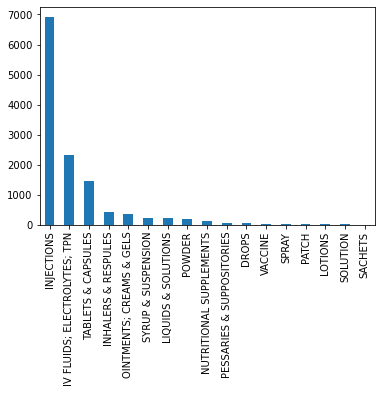

In [120]:
pharma_data.SubCat.value_counts().plot.bar()

<AxesSubplot:>

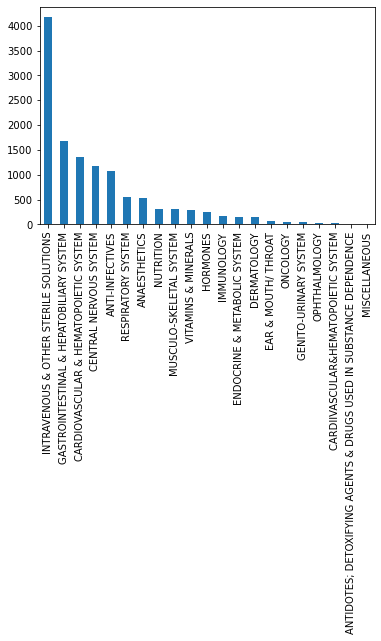

In [121]:
pharma_data.SubCat1.value_counts().plot.bar()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Form1'),
  Text(1, 0, 'Form2'),
  Text(2, 0, 'Patent'),
  Text(3, 0, 'Form3')])

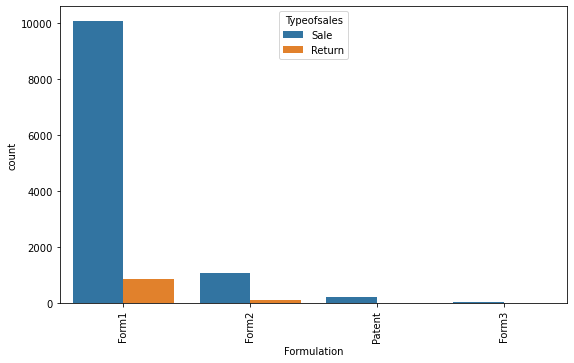

In [131]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Formulation', hue = 'Typeofsales', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jun'),
  Text(1, 0, 'Mar'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'May'),
  Text(4, 0, 'Jan'),
  Text(5, 0, 'Aug'),
  Text(6, 0, 'Oct'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Nov'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Feb'),
  Text(11, 0, 'Apr')])

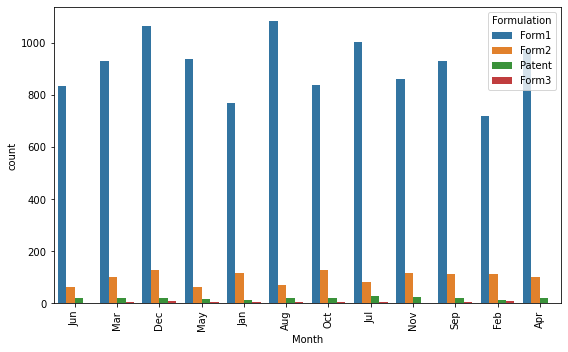

In [165]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Month', hue = 'Formulation', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Specialisation6'),
  Text(1, 0, 'Specialisation40'),
  Text(2, 0, 'Specialisation5'),
  Text(3, 0, 'Specialisation2'),
  Text(4, 0, 'Specialisation4'),
  Text(5, 0, 'Specialisation7'),
  Text(6, 0, 'Specialisation16'),
  Text(7, 0, 'Specialisation25'),
  Text(8, 0, 'Specialisation20'),
  Text(9, 0, 'Specialisation54'),
  Text(10, 0, 'Specialisation14'),
  Text(11, 0, 'Specialisation27'),
  Text(12, 0, 'Specialisation21'),
  Text(13, 0, 'Specialisation11'),
  Text(14, 0, 'Specialisation15'),
  Text(15, 0, 'Specialisation45'),
  Text(16, 0, 'Specialisation3'),
  Text(17, 0, 'Specialisation1'),
  Text(18, 0, 'Specialisation8'),
  Text(19, 0, 'Specialisation26'),
  Text(20, 0, 'Specialisation75'),
  Text(21, 0, 'Sp

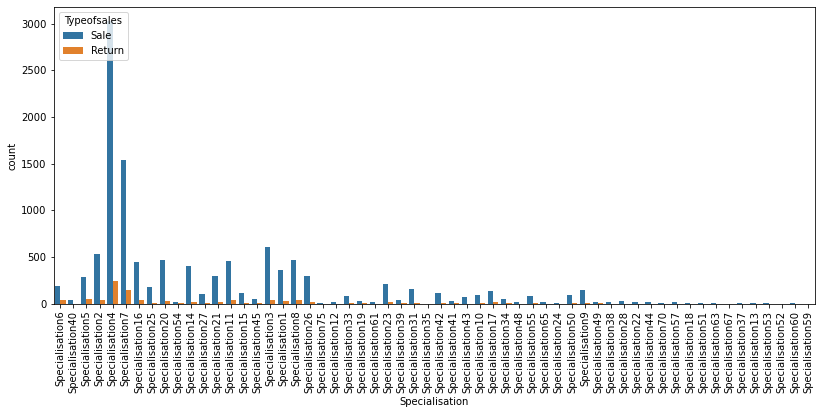

In [276]:
plt.figure(figsize = (30,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Specialisation', hue = 'Typeofsales', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'SYRUP & SUSPENSION'),
  Text(1, 0, 'INJECTIONS'),
  Text(2, 0, 'TABLETS & CAPSULES'),
  Text(3, 0, 'IV FLUIDS; ELECTROLYTES; TPN'),
  Text(4, 0, 'NUTRITIONAL SUPPLEMENTS'),
  Text(5, 0, 'OINTMENTS; CREAMS & GELS'),
  Text(6, 0, 'PESSARIES & SUPPOSITORIES'),
  Text(7, 0, 'INHALERS & RESPULES'),
  Text(8, 0, 'LIQUIDS & SOLUTIONS'),
  Text(9, 0, 'DROPS'),
  Text(10, 0, 'POWDER'),
  Text(11, 0, 'LOTIONS'),
  Text(12, 0, 'SPRAY'),
  Text(13, 0, 'VACCINE'),
  Text(14, 0, 'PATCH'),
  Text(15, 0, 'SACHETS'),
  Text(16, 0, 'SOLUTION')])

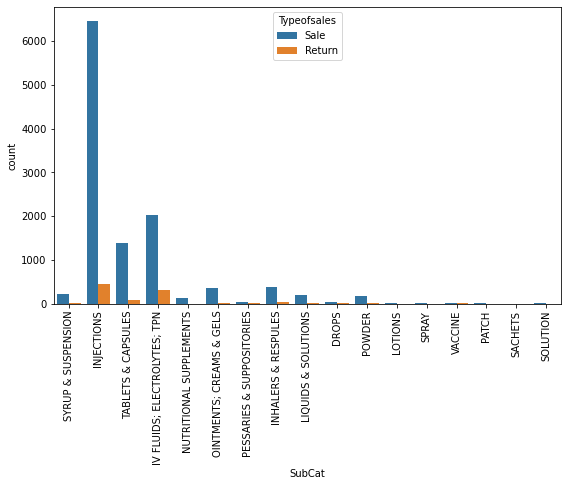

In [132]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.countplot(x = 'SubCat', hue = 'Typeofsales', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'VITAMINS & MINERALS'),
  Text(1, 0, 'INTRAVENOUS & OTHER STERILE SOLUTIONS'),
  Text(2, 0, 'CENTRAL NERVOUS SYSTEM'),
  Text(3, 0, 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM'),
  Text(4, 0, 'NUTRITION'),
  Text(5, 0, 'ANAESTHETICS'),
  Text(6, 0, 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM'),
  Text(7, 0, 'ANTI-INFECTIVES'),
  Text(8, 0, 'HORMONES'),
  Text(9, 0, 'MUSCULO-SKELETAL SYSTEM'),
  Text(10, 0, 'ENDOCRINE & METABOLIC SYSTEM'),
  Text(11, 0, 'RESPIRATORY SYSTEM'),
  Text(12, 0, 'OPHTHALMOLOGY'),
  Text(13, 0, 'IMMUNOLOGY'),
  Text(14, 0, 'EAR & MOUTH/ THROAT'),
  Text(15, 0, 'GENITO-URINARY SYSTEM'),
  Text(16, 0, 'DERMATOLOGY'),
  Text(17, 0, 'ONCOLOGY'),
  Text(18, 0, 'ANTIDOTES; DETOXIFYING AGENTS & DRUGS USED IN SUBSTANCE DEPENDENCE'),
  Text(19, 0, 'CARDIIVASCULAR&HEMATOPOIETIC SYSTEM'),
  Text(20, 0, 'MISCELLANEOUS')])

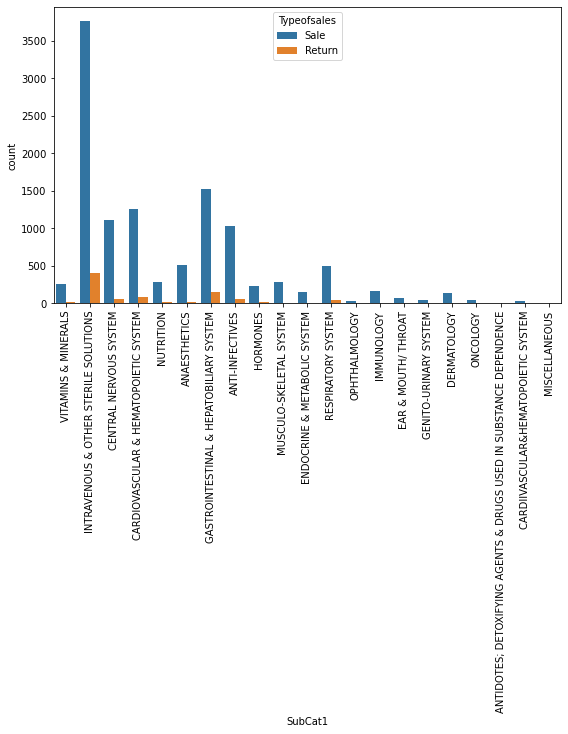

In [133]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.countplot(x = 'SubCat1', hue = 'Typeofsales', data = pharma_data)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Form1'),
  Text(1, 0, 'Form2'),
  Text(2, 0, 'Patent'),
  Text(3, 0, 'Form3')])

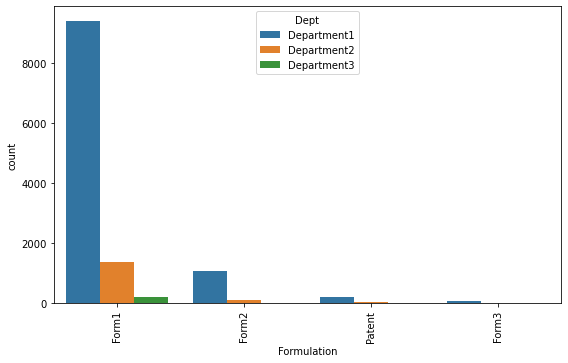

In [134]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Formulation', hue = 'Dept', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'SYRUP & SUSPENSION'),
  Text(1, 0, 'INJECTIONS'),
  Text(2, 0, 'TABLETS & CAPSULES'),
  Text(3, 0, 'IV FLUIDS; ELECTROLYTES; TPN'),
  Text(4, 0, 'NUTRITIONAL SUPPLEMENTS'),
  Text(5, 0, 'OINTMENTS; CREAMS & GELS'),
  Text(6, 0, 'PESSARIES & SUPPOSITORIES'),
  Text(7, 0, 'INHALERS & RESPULES'),
  Text(8, 0, 'LIQUIDS & SOLUTIONS'),
  Text(9, 0, 'DROPS'),
  Text(10, 0, 'POWDER'),
  Text(11, 0, 'LOTIONS'),
  Text(12, 0, 'SPRAY'),
  Text(13, 0, 'VACCINE'),
  Text(14, 0, 'PATCH'),
  Text(15, 0, 'SACHETS'),
  Text(16, 0, 'SOLUTION')])

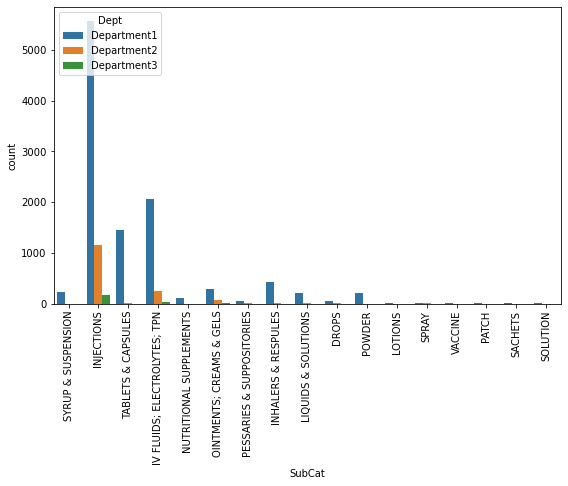

In [135]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'SubCat', hue = 'Dept', data = pharma_data)
plt.xticks(rotation = 90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'VITAMINS & MINERALS'),
  Text(1, 0, 'INTRAVENOUS & OTHER STERILE SOLUTIONS'),
  Text(2, 0, 'CENTRAL NERVOUS SYSTEM'),
  Text(3, 0, 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM'),
  Text(4, 0, 'NUTRITION'),
  Text(5, 0, 'ANAESTHETICS'),
  Text(6, 0, 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM'),
  Text(7, 0, 'ANTI-INFECTIVES'),
  Text(8, 0, 'HORMONES'),
  Text(9, 0, 'MUSCULO-SKELETAL SYSTEM'),
  Text(10, 0, 'ENDOCRINE & METABOLIC SYSTEM'),
  Text(11, 0, 'RESPIRATORY SYSTEM'),
  Text(12, 0, 'OPHTHALMOLOGY'),
  Text(13, 0, 'IMMUNOLOGY'),
  Text(14, 0, 'EAR & MOUTH/ THROAT'),
  Text(15, 0, 'GENITO-URINARY SYSTEM'),
  Text(16, 0, 'DERMATOLOGY'),
  Text(17, 0, 'ONCOLOGY'),
  Text(18, 0, 'ANTIDOTES; DETOXIFYING AGENTS & DRUGS USED IN SUBSTANCE DEPENDENCE'),
  Text(19, 0, 'CARDIIVASCULAR&HEMATOPOIETIC SYSTEM'),
  Text(20, 0, 'MISCELLANEOUS')])

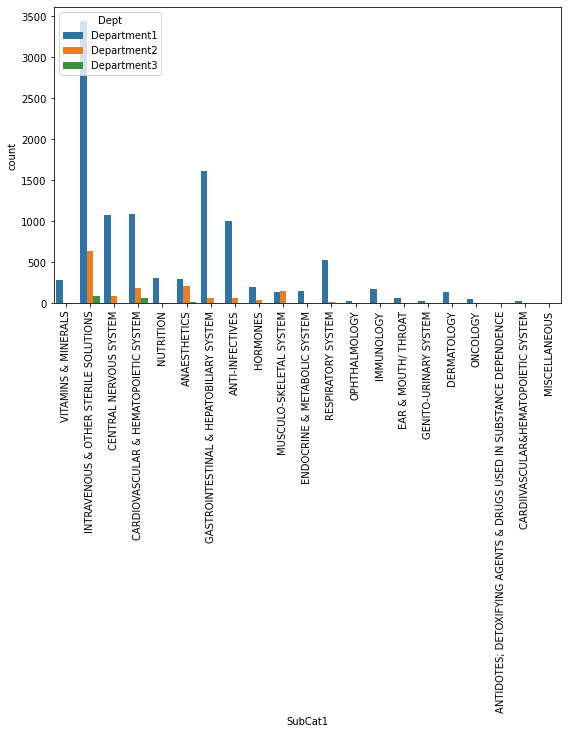

In [136]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'SubCat1', hue = 'Dept', data = pharma_data)
plt.xticks(rotation = 90)

# Bivariate Analysis

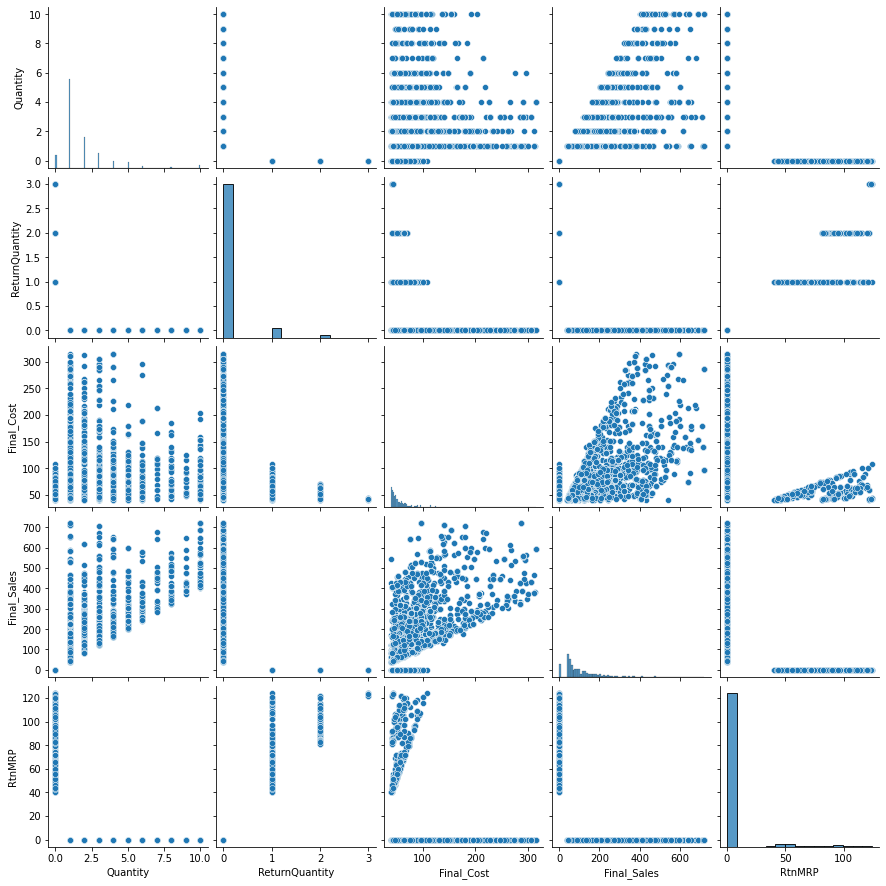

In [137]:
sns.pairplot(data=pharma_data,vars=['Quantity',
       'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP'])
plt.show()

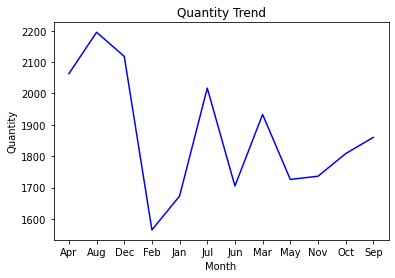

In [156]:
Month = pharma_data.groupby('Month')['Quantity'].sum()
plt.plot(Month.index, Month.values, color = 'blue')
plt.title('Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

In [282]:
pharma_data.head()

Typeofsales    Specialisation         Dept Dateofbill  Quantity  \
0        Sale   Specialisation6  Department1 2022-06-01         1   
3        Sale  Specialisation40  Department1 2022-03-17         2   
4        Sale   Specialisation5  Department1 2022-12-21         1   
6        Sale   Specialisation2  Department1 2022-05-22         1   
7        Sale   Specialisation4  Department1 2022-01-12         3   

   ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0               0      55.406       59.260     0.0       Form1   
3               0      40.798       81.044     0.0       Form1   
4               0      40.434       40.504     0.0       Form1   
6               0      41.862       42.218     0.0       Form1   
7               0      60.026      142.752     0.0       Form1   

                            DrugName                        SubCat  \
0          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION   
3  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
4                      LORAZEPAM 1MG            TABLETS & CAPSULES   
6                 FUROSEMIDE 10MG/ML                    INJECTIONS   
7          SODIUM CHLORIDE IVF 100ML  IV FLUIDS; ELECTROLYTES; TPN   

                                 SubCat1 Month  \
0                    VITAMINS & MINERALS   Jun   
3  INTRAVENOUS & OTHER STERILE SOLUTIONS   Mar   
4                 CENTRAL NERVOUS SYSTEM   Dec   
6  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM   May   
7  INTRAVENOUS & OTHER STERILE SOLUTIONS   Jan   

                     TruncatedColumn  
0          ZINC ACETATE 20MG/5ML SYP  
3  WATER FOR INJECTION 10ML SOLUT...  
4                      LORAZEPAM 1MG  
6                 FUROSEMIDE 10MG/ML  
7          SODIUM CHLORIDE IVF 100ML

In [159]:
pharma_data.columns

Index(['Typeofsales', 'Specialisation', 'Dept', 'Dateofbill', 'Quantity',
       'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP', 'Formulation',
       'DrugName', 'SubCat', 'SubCat1', 'Month', 'TruncatedColumn'],
      dtype='object')

In [160]:
cont_cols=['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']
cat_cols=['Typeofsales', 'Specialisation', 'Dept', 'Formulation', 'DrugName','SubCat', 'SubCat1']

len(set(cont_cols))+len(set(cat_cols))

12

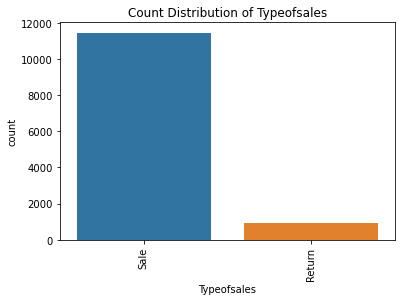

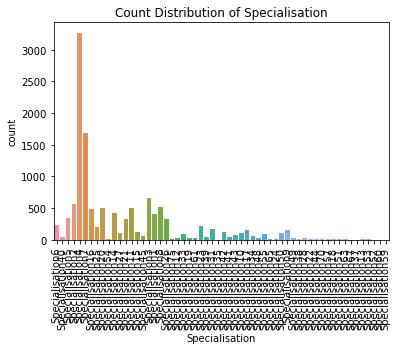

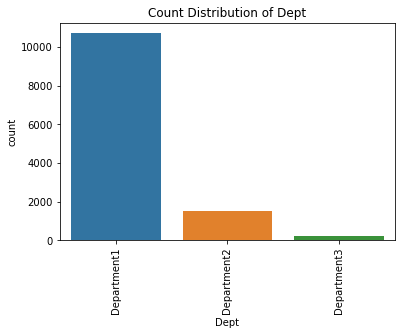

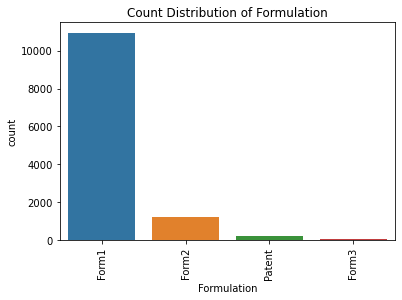

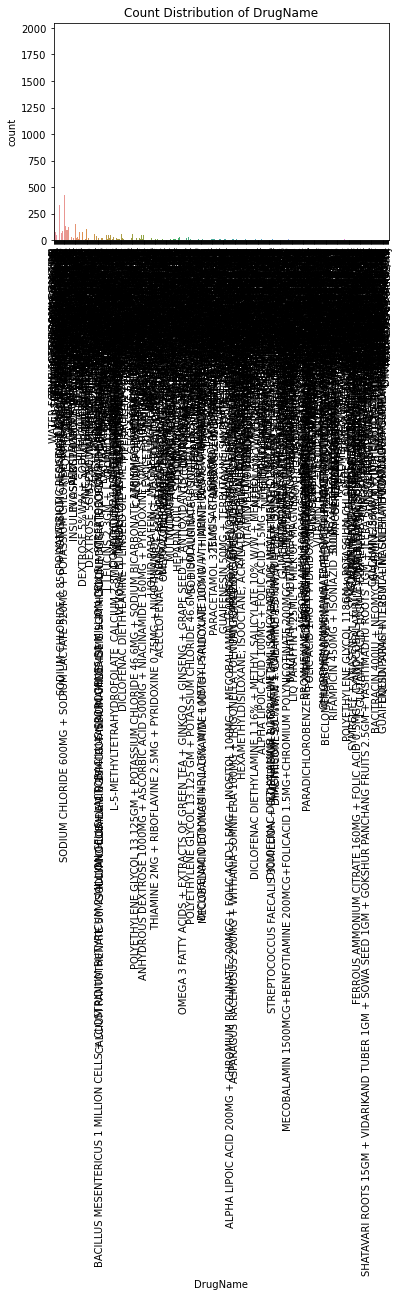

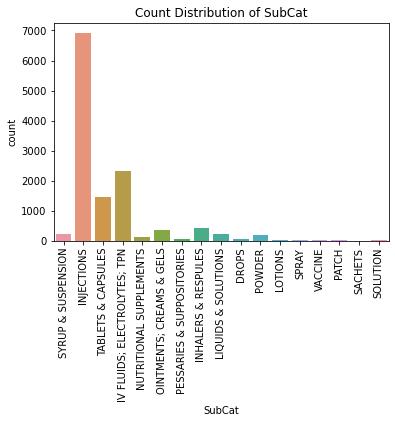

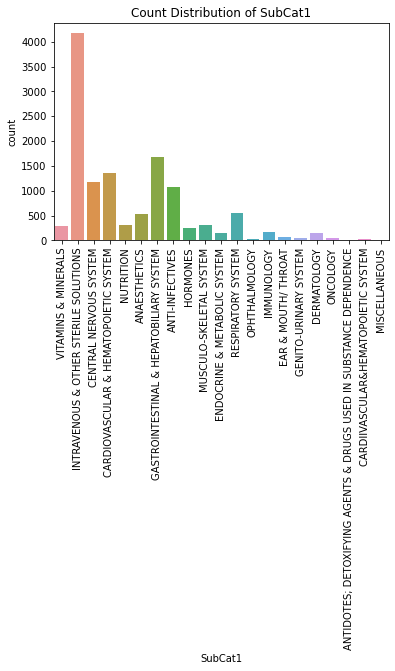

In [162]:
for i in cat_cols:
    sns.countplot(pharma_data[i])
    plt.xlabel(i)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()

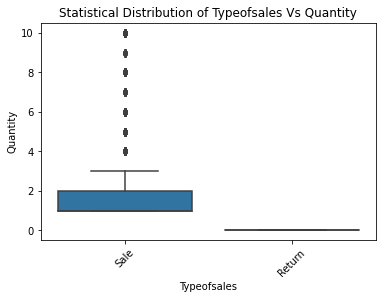

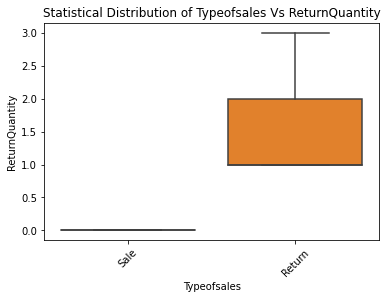

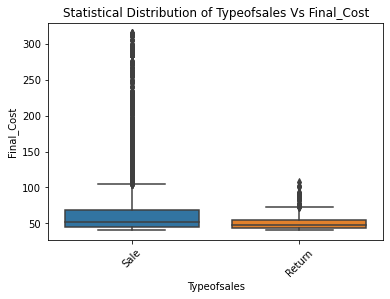

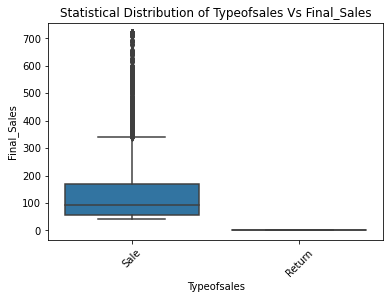

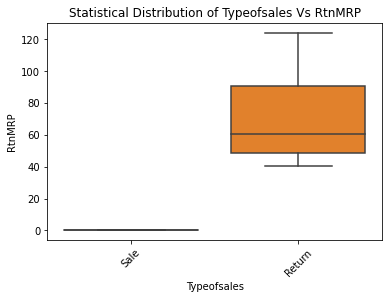

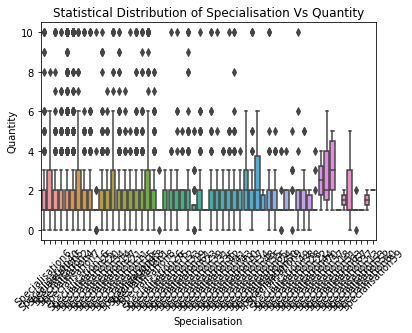

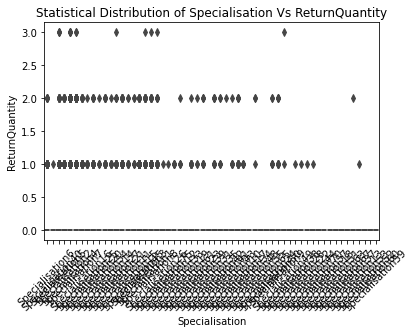

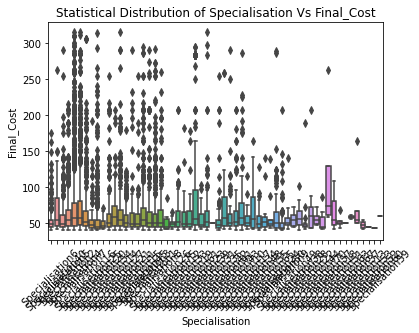

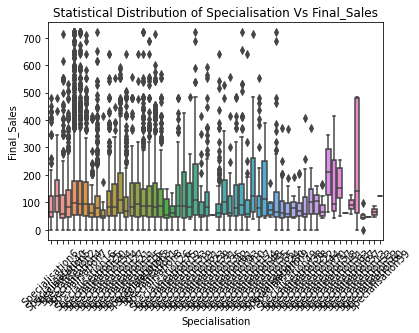

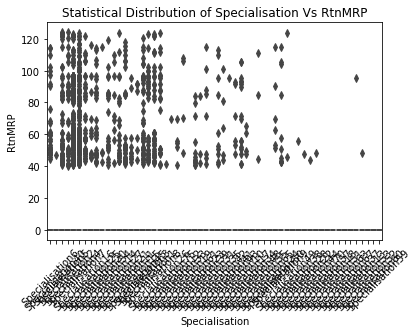

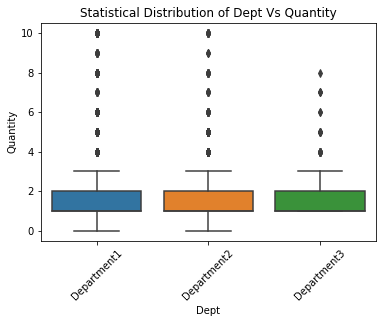

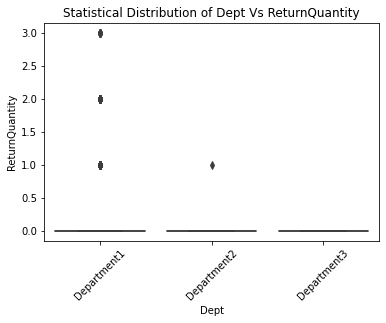

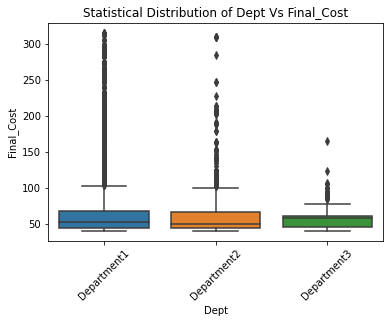

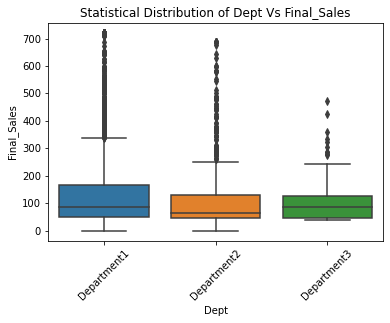

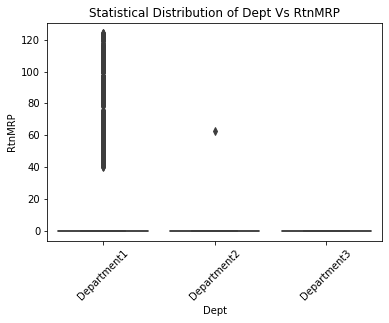

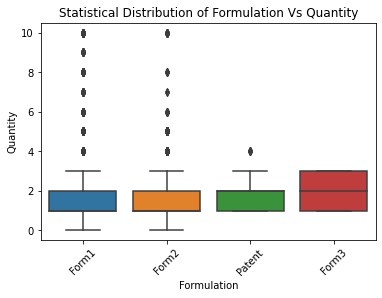

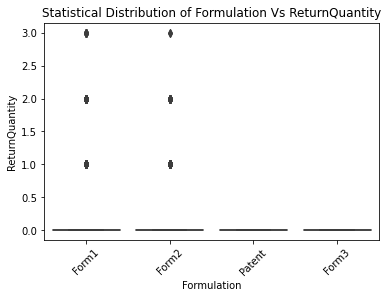

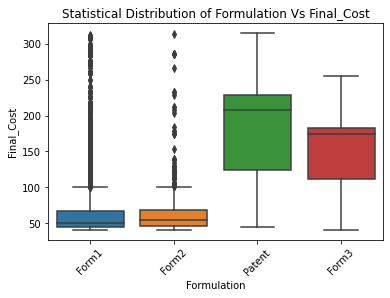

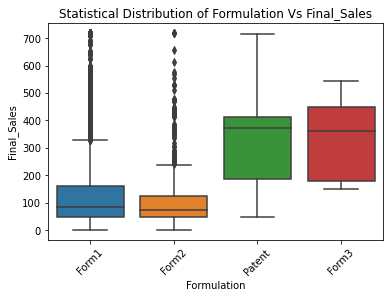

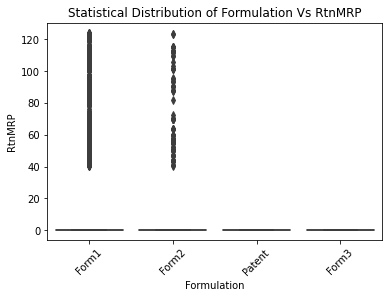

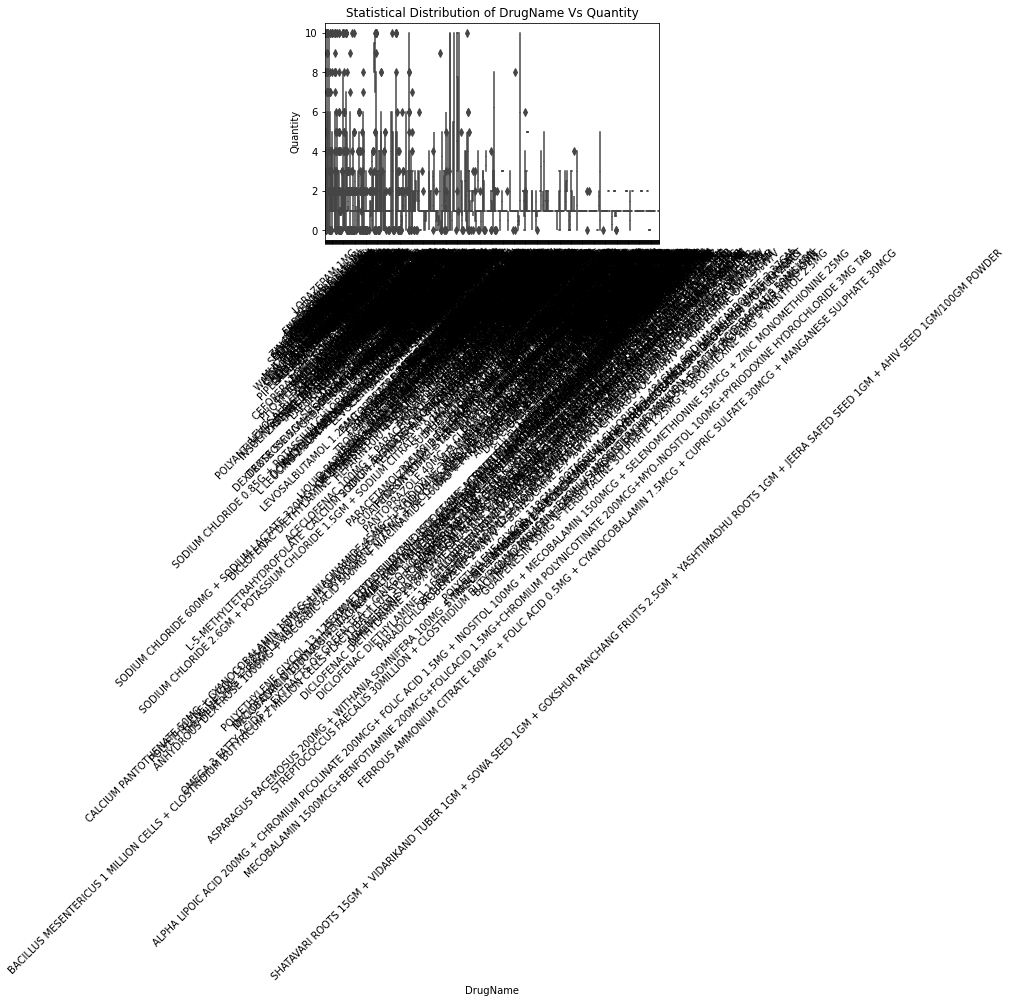

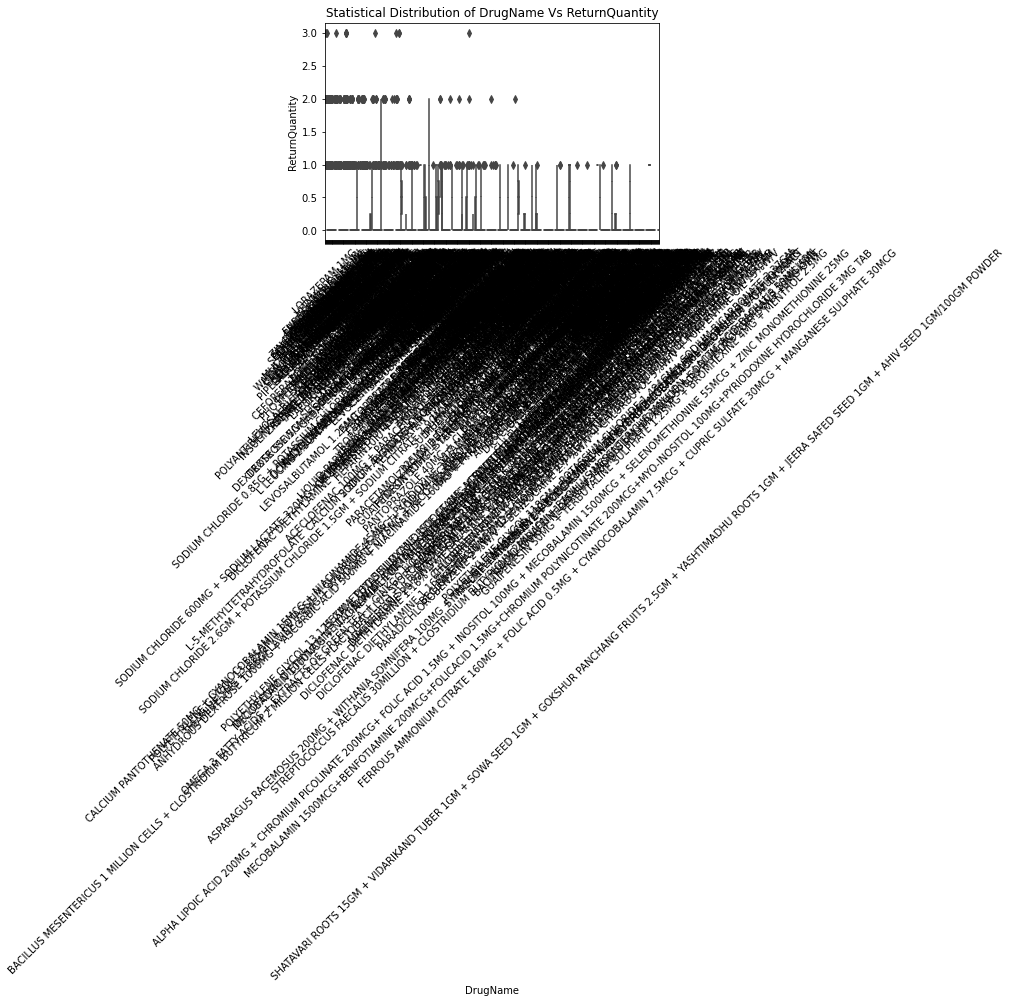

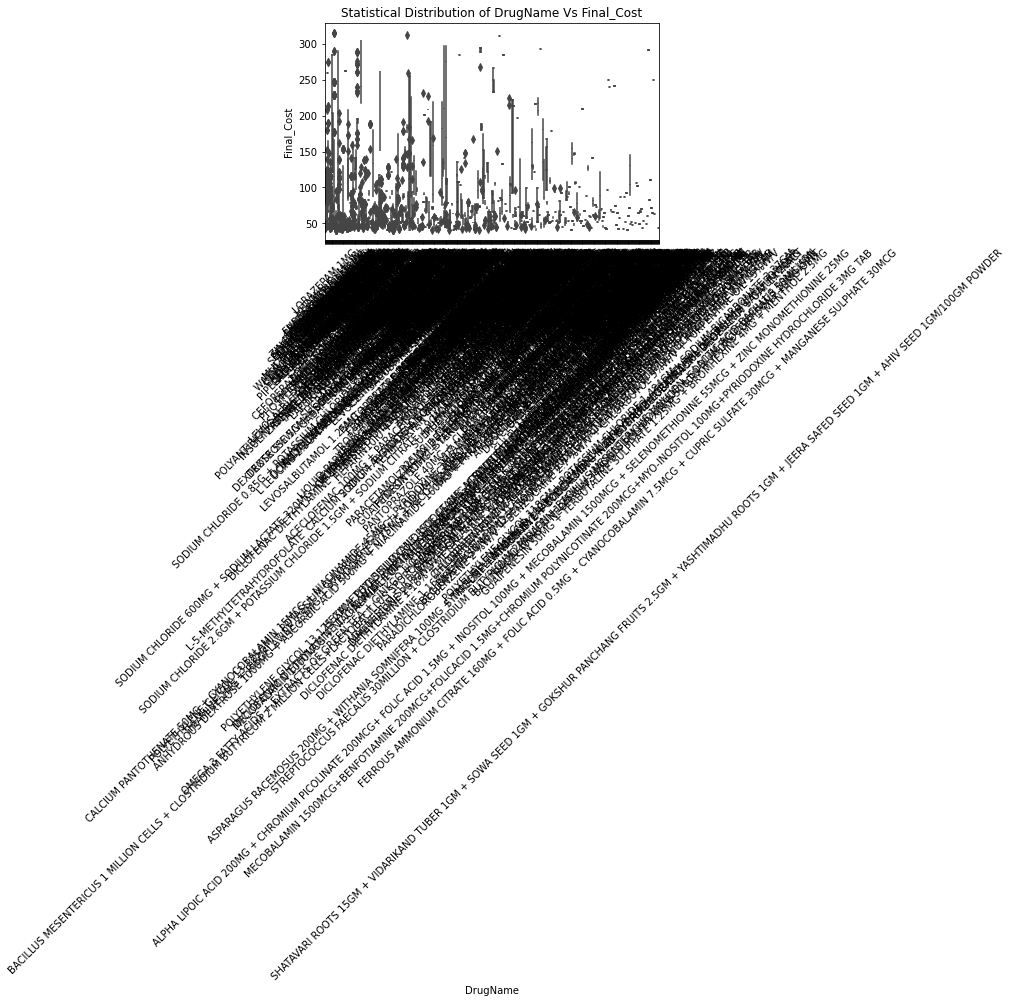

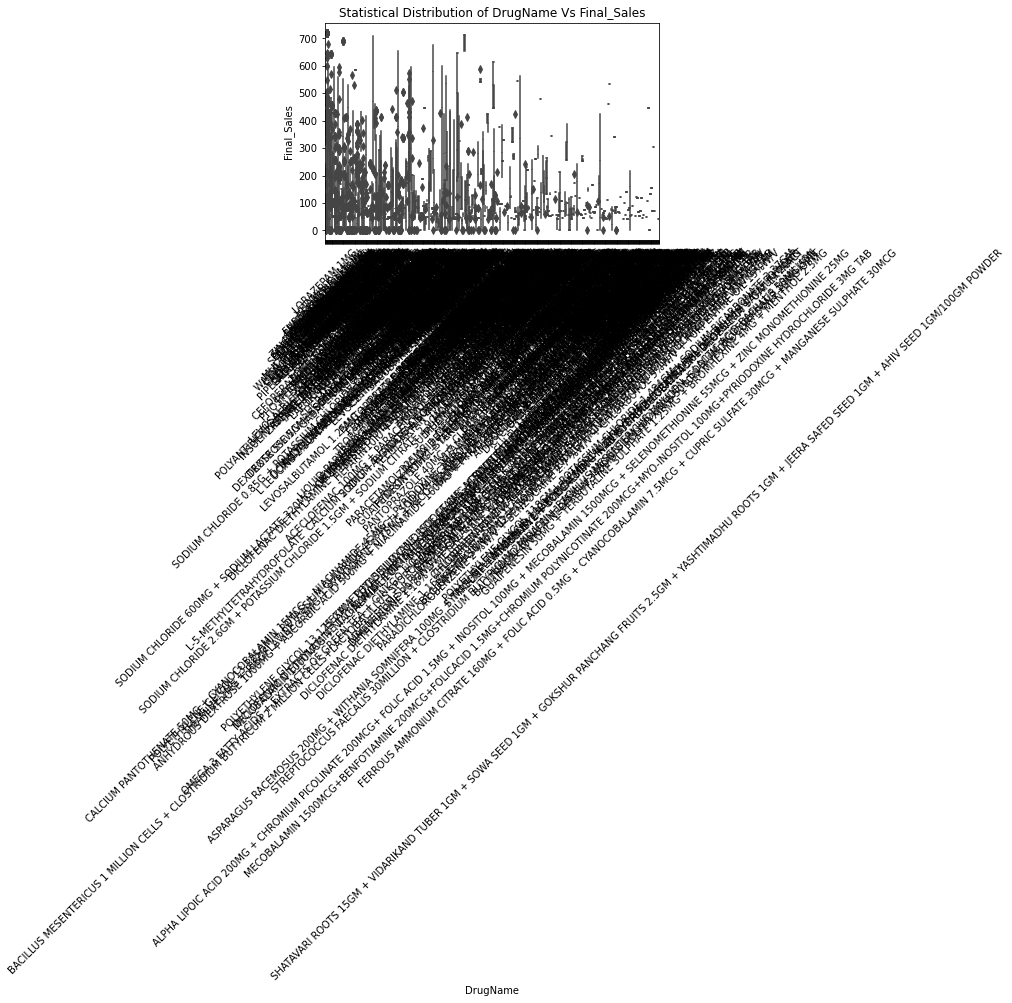

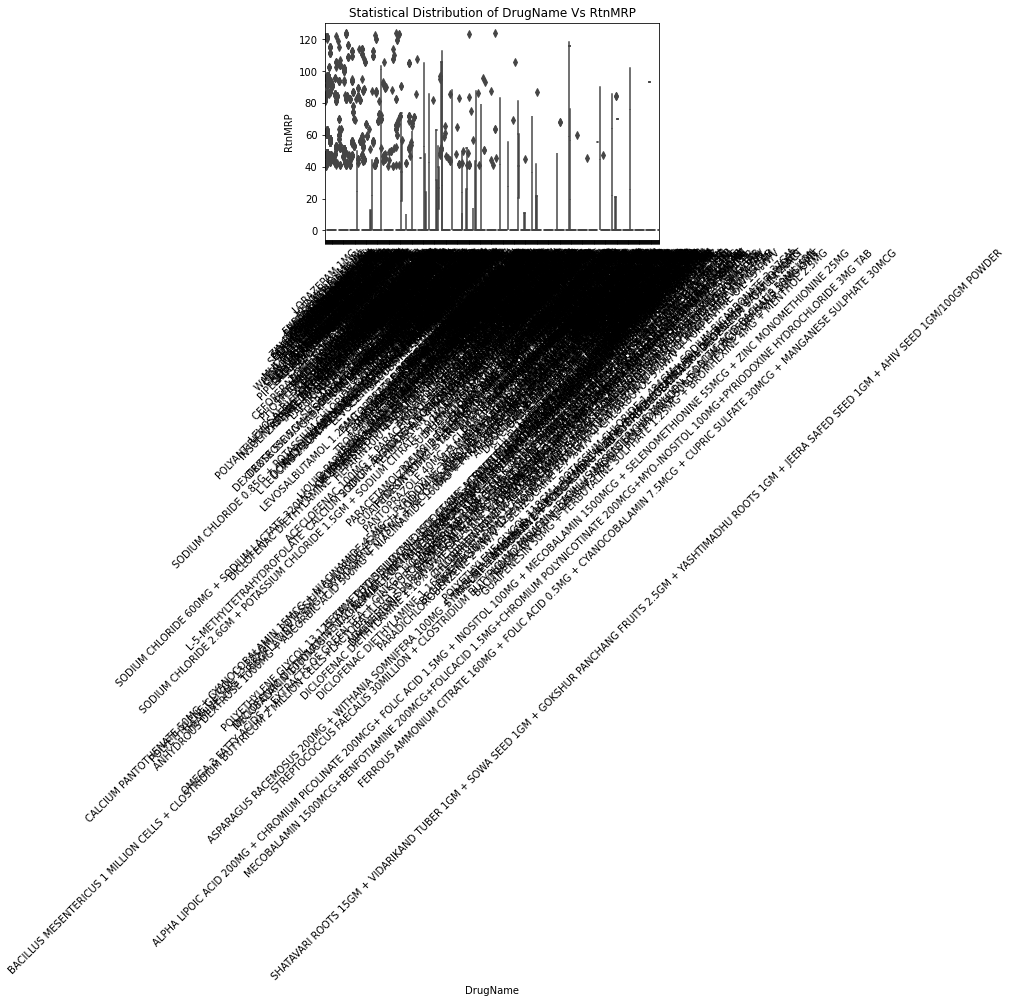

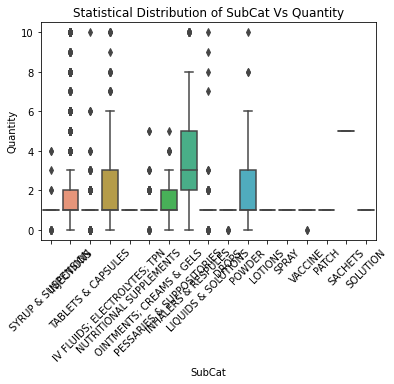

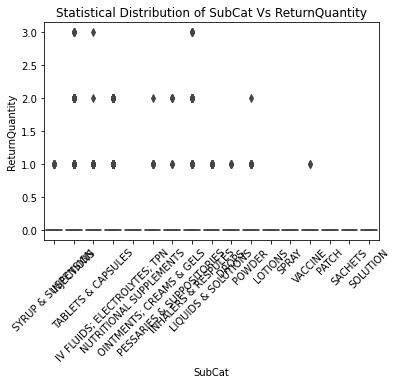

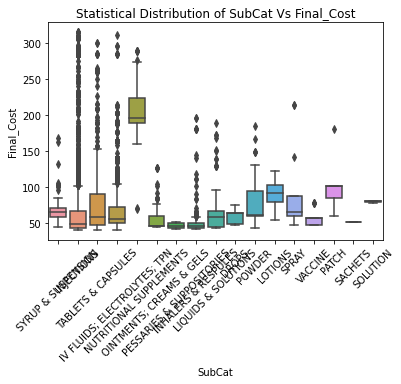

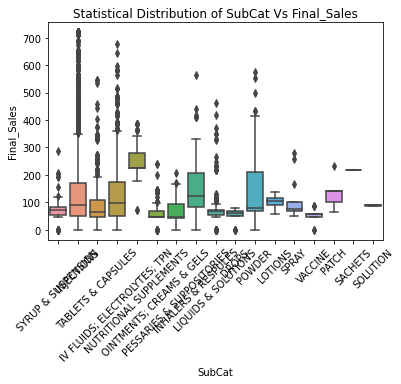

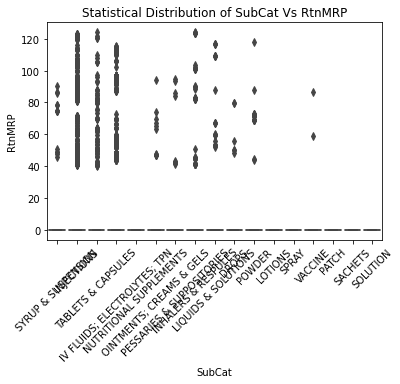

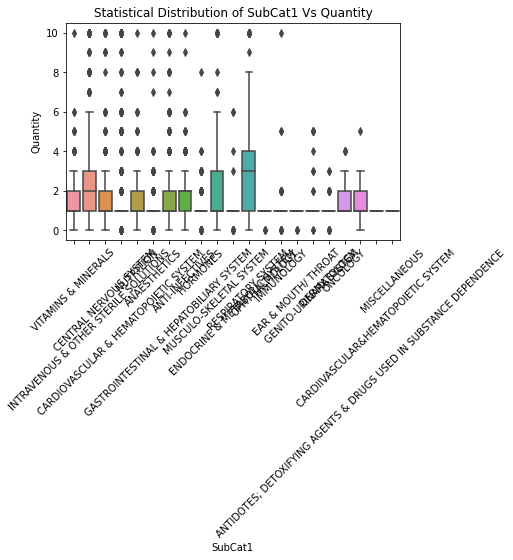

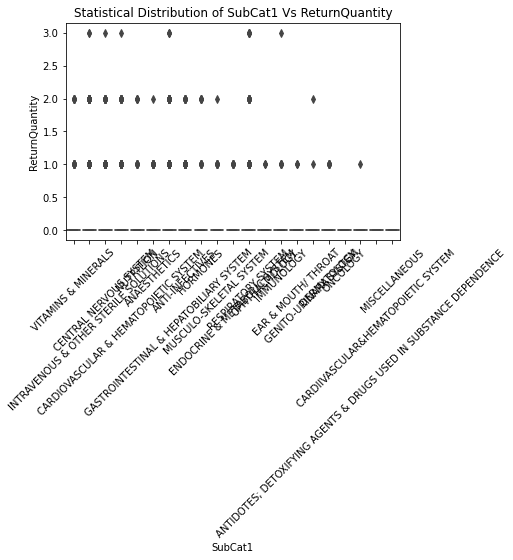

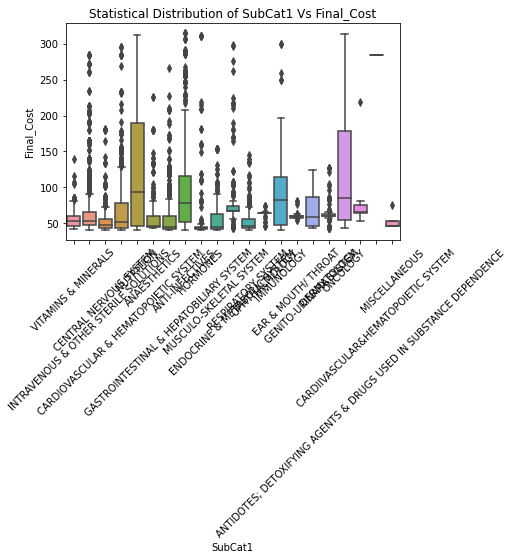

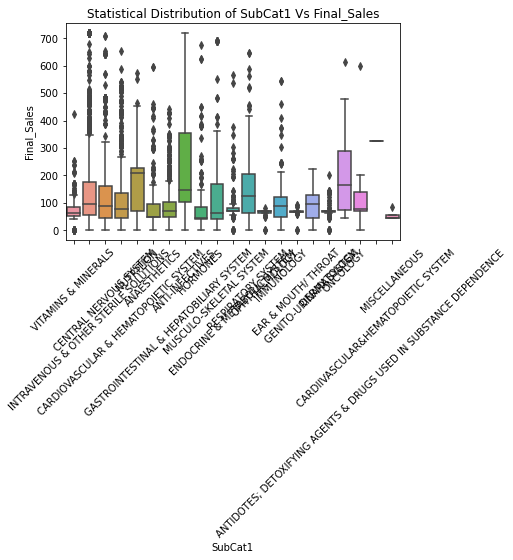

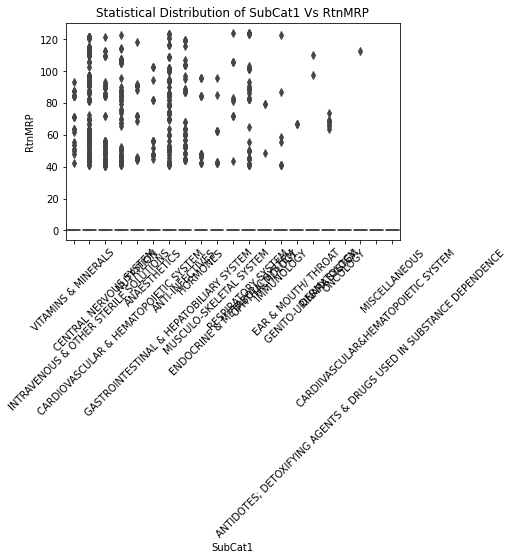

In [163]:
for x in cat_cols:
    for y in cont_cols:
        sns.boxplot(pharma_data[x],pharma_data[y])
        plt.xlabel(x)
        plt.title("Statistical Distribution of "+x+" Vs "+y)
        plt.xticks(rotation=45)
        plt.show()

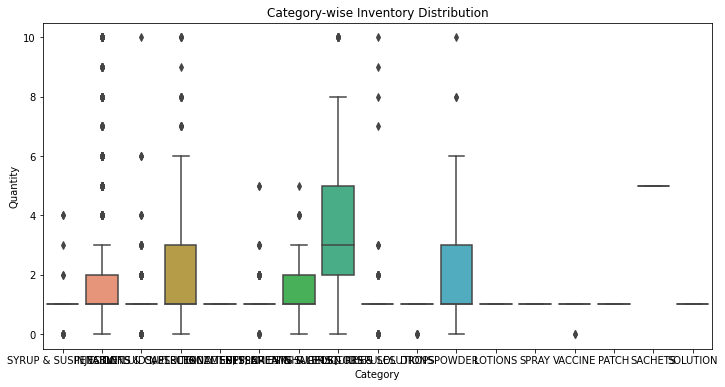

In [169]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SubCat', y='Quantity', data=pharma_data)
plt.title('Category-wise Inventory Distribution')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

In [172]:
pharma_data.Typeofsales.value_counts(normalize= True)

Sale      0.923505
Return    0.076495
Name: Typeofsales, dtype: float64

In [173]:
pharma_data.ReturnQuantity.sum()

1204

In [174]:
pharma_data.Quantity.sum()

22399

<AxesSubplot:ylabel='Typeofsales'>

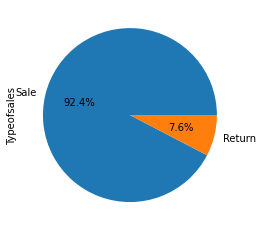

In [281]:
data = pharma_data.Typeofsales.value_counts(normalize= True)
data.plot.pie(autopct='%1.1f%%')

In [184]:
return_quantity = pharma_data[(pharma_data['Final_Sales'] == 0) & (pharma_data['Typeofsales'] == 'Return')]

In [185]:
return_quantity_by_subcat = return_quantity.groupby('SubCat')['DrugName'].count()

In [187]:
print(return_quantity_by_subcat.sort_values())

SubCat
VACCINE                           2
DROPS                             6
PESSARIES & SUPPOSITORIES         8
OINTMENTS; CREAMS & GELS         12
SYRUP & SUSPENSION               14
POWDER                           17
LIQUIDS & SOLUTIONS              20
INHALERS & RESPULES              43
TABLETS & CAPSULES               77
IV FLUIDS; ELECTROLYTES; TPN    310
INJECTIONS                      440
Name: DrugName, dtype: int64


<AxesSubplot:xlabel='SubCat'>

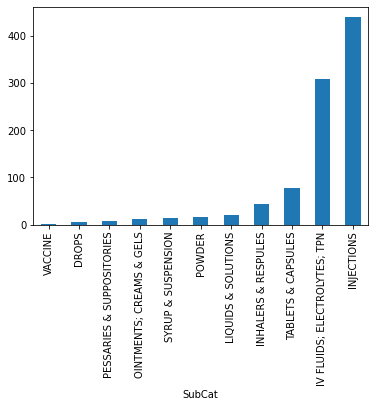

In [199]:
return_quantity_by_subcat.sort_values().plot.bar()

In [190]:
filter_data = pharma_data[pharma_data['SubCat']=='INJECTIONS']

In [194]:
result = filter_data.groupby(['SubCat', 'Formulation']).sum()

In [195]:
print(result)

                        Quantity  ReturnQuantity  Final_Cost  Final_Sales  \
SubCat     Formulation                                                      
INJECTIONS Form1           12296             549  358687.210   819309.466   
           Form2             828              28   30463.042    64312.606   
           Form3              94               0    7676.480    16084.000   
           Patent            366               0   36422.998    69678.392   

                           RtnMRP  
SubCat     Formulation             
INJECTIONS Form1        28804.942  
           Form2         1561.808  
           Form3            0.000  
           Patent           0.000  


# Multivariate Analysis

In [214]:
corr=pharma_data.corr()

In [215]:
corr

Quantity  ReturnQuantity  Final_Cost  Final_Sales    RtnMRP
Quantity        1.000000       -0.290247    0.126094     0.723122 -0.293315
ReturnQuantity -0.290247        1.000000   -0.104063    -0.283509  0.962538
Final_Cost      0.126094       -0.104063    1.000000     0.623959 -0.088881
Final_Sales     0.723122       -0.283509    0.623959     1.000000 -0.286505
RtnMRP         -0.293315        0.962538   -0.088881    -0.286505  1.000000

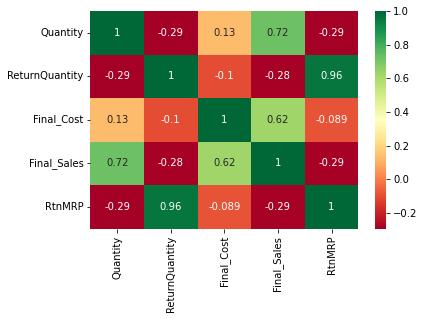

In [218]:
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [220]:
result1 = pharma_data.pivot_table(index="SubCat", columns="Month", values="Quantity")
result1

Month                              Apr       Aug       Dec       Feb  \
SubCat                                                                 
DROPS                         0.888889  1.000000  1.000000  1.000000   
INHALERS & RESPULES           2.681818  3.170732  3.000000  3.033333   
INJECTIONS                    2.101836  2.041602  1.921986  1.997768   
IV FLUIDS; ELECTROLYTES; TPN  2.017391  1.886555  1.668367  2.016484   
LIQUIDS & SOLUTIONS           1.045455  1.307692  0.916667  1.153846   
LOTIONS                            NaN  1.000000  1.000000       NaN   
NUTRITIONAL SUPPLEMENTS       1.000000  1.000000  1.000000  1.000000   
OINTMENTS; CREAMS & GELS      1.032258  1.156250  1.066667  1.115385   
PATCH                         1.000000       NaN  1.000000       NaN   
PESSARIES & SUPPOSITORIES     1.000000  1.600000  1.250000  1.250000   
POWDER                        2.428571  1.650000  1.722222  1.928571   
SACHETS                       5.000000       NaN       NaN       NaN   
SOLUTION                      1.000000       NaN       NaN       NaN   
SPRAY                         1.000000       NaN  1.000000  1.000000   
SYRUP & SUSPENSION            1.000000  0.913043  1.083333  0.928571   
TABLETS & CAPSULES            1.062992  1.091603  1.027778  1.028846   
VACCINE                       1.000000  1.000000  1.000000  1.000000   

Month                              Jan       Jul       Jun       Mar  \
SubCat                                                                 
DROPS                         0.000000  1.000000  1.000000  1.000000   
INHALERS & RESPULES           3.756098  3.205128  3.071429  3.640000   
INJECTIONS                    1.972163  1.946774  1.945344  2.084507   
IV FLUIDS; ELECTROLYTES; TPN  2.016854  1.919283  2.255208  1.850467   
LIQUIDS & SOLUTIONS           1.315789  0.875000  1.050000  1.263158   
LOTIONS                            NaN       NaN  1.000000       NaN   
NUTRITIONAL SUPPLEMENTS       1.000000  1.000000  1.000000  1.000000   
OINTMENTS; CREAMS & GELS      1.125000  1.058824  1.136364  1.031250   
PATCH                              NaN       NaN       NaN  1.000000   
PESSARIES & SUPPOSITORIES     1.500000  2.000000  3.666667       NaN   
POWDER                        2.333333  2.000000  1.529412  1.625000   
SACHETS                            NaN       NaN       NaN       NaN   
SOLUTION                      1.000000       NaN  1.000000       NaN   
SPRAY                         1.000000  1.000000  1.000000  1.000000   
SYRUP & SUSPENSION            1.000000  1.120000  1.000000  1.000000   
TABLETS & CAPSULES            0.991597  0.954545  1.000000  1.014706   
VACCINE                       1.000000  1.000000  1.000000  1.000000   

Month                              May       Nov       Oct       Sep  
SubCat                                                                
DROPS                         0.666667  1.000000  1.000000  0.857143  
INHALERS & RESPULES           3.516129  2.809524  2.833333  3.139535  
INJECTIONS                    1.760456  1.917647  2.032423  1.892857  
IV FLUIDS; ELECTROLYTES; TPN  1.895928  1.642857  1.735849  1.650000  
LIQUIDS & SOLUTIONS           1.000000  1.733333  1.000000  1.095238  
LOTIONS                            NaN       NaN       NaN       NaN  
NUTRITIONAL SUPPLEMENTS       1.000000  1.000000  1.000000  1.000000  
OINTMENTS; CREAMS & GELS      0.862069  1.150000  1.129032  1.192308  
PATCH                         1.000000  1.000000  1.000000  1.000000  
PESSARIES & SUPPOSITORIES     1.600000  1.200000  1.600000  1.666667  
POWDER                        2.437500  1.357143  1.933333  1.727273  
SACHETS                            NaN       NaN       NaN       NaN  
SOLUTION                           NaN       NaN       NaN       NaN  
SPRAY                              NaN       NaN       NaN       NaN  
SYRUP & SUSPENSION            0.954545  0.900000  0.909091  0.894737  
TABLETS & CAPSULES            1.078014  1.008333  1.019

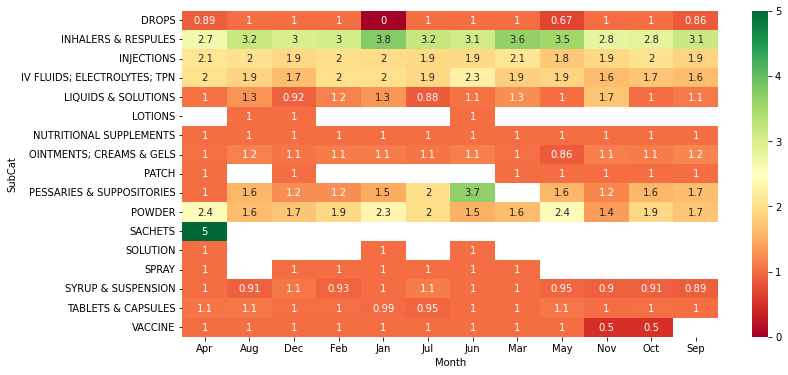

In [223]:
plt.figure(figsize=(12, 6))
sns.heatmap(result1,annot=True,cmap="RdYlGn")
plt.show()

In [226]:
result2 = pharma_data.pivot_table(index="SubCat", columns="Formulation", values="Final_Sales")
result2

Formulation                        Form1       Form2       Form3      Patent
SubCat                                                                      
DROPS                          55.809961    0.000000         NaN         NaN
INHALERS & RESPULES           140.185702   70.882000         NaN         NaN
INJECTIONS                    132.617265  136.835332  328.244898  341.560745
IV FLUIDS; ELECTROLYTES; TPN  125.695002   98.628441         NaN         NaN
LIQUIDS & SOLUTIONS            80.761733   69.393000         NaN         NaN
LOTIONS                       101.091500         NaN         NaN         NaN
NUTRITIONAL SUPPLEMENTS       252.213913  244.000000         NaN         NaN
OINTMENTS; CREAMS & GELS       59.949403   71.000000         NaN         NaN
PATCH                         112.475000  140.000000         NaN         NaN
PESSARIES & SUPPOSITORIES      77.727357   64.392917         NaN         NaN
POWDER                        127.126623  127.500000         NaN         NaN
SACHETS                       219.430000         NaN         NaN         NaN
SOLUTION                       89.000000         NaN         NaN         NaN
SPRAY                         120.464000   58.480000         NaN         NaN
SYRUP & SUSPENSION             70.960104   77.440000         NaN         NaN
TABLETS & CAPSULES             85.119173   70.376948         NaN  273.091100
VACCINE                        53.136421         NaN         NaN         NaN

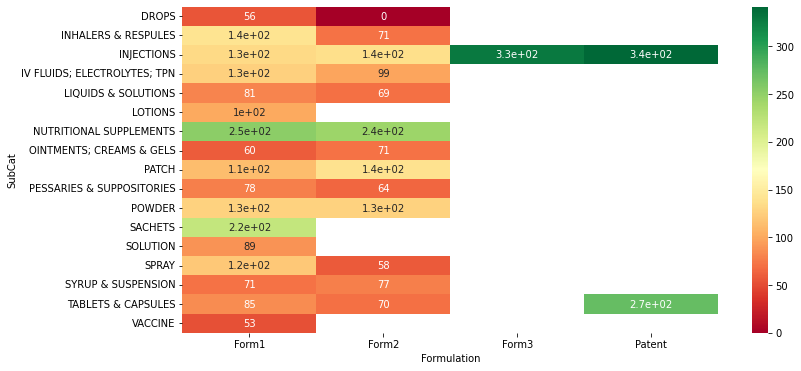

In [227]:
plt.figure(figsize=(12, 6))
sns.heatmap(result2,annot=True,cmap="RdYlGn")
plt.show()

# Auto EDA

# D tale

In [251]:
!pip install numpy==1.20.0

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.


In [252]:
!pip install dtale

In [253]:
import seaborn as sns
import numpy as np

In [254]:
df = pd.read_csv('Medical Inventory Optimaization Dataset1.csv')

In [255]:
df.head()

Typeofsales   Patient_ID         Dept  Dateofbill  Quantity  ReturnQuantity  \
0        Sale  12018098765  Department1  2022-06-01         1               0   
1        Sale  12018103897  Department1  2022-07-23         1               0   
2        Sale  12018101123  Department3  2022-06-23         1               0   
3        Sale  12018079281  Department1  2022-03-17         2               0   
4        Sale  12018117928  Department1  2022-12-21         1               0   

   Final_Cost  Final_Sales  RtnMRP Formulation  \
0      55.406       59.260     0.0       Form1   
1     768.638      950.800     0.0       Form1   
2     774.266     4004.214     0.0       Form2   
3      40.798       81.044     0.0       Form1   
4      40.434       40.504     0.0       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS   
4                      LORAZEPAM 1MG  TABLETS & CAPSULES   

                                 SubCat1  
0                    VITAMINS & MINERALS  
1                        ANTI-INFECTIVES  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS  
4                 CENTRAL NERVOUS SYSTEM

In [256]:
import dtale
dtale.show(df)

In [274]:
!pip install llvmlite -- ignore installed llvmlite

  Using cached ignore-0.1.4.tar.gz (2.4 kB)


ERROR: Could not find a version that satisfies the requirement installed (from versions: none)
ERROR: No matching distribution found for installed
2024-01-17 19:53:55,249 - INFO     - Executing shutdown due to inactivity...
2024-01-17 19:54:07,498 - INFO     - Executing shutdown...
